<a href="https://colab.research.google.com/github/karthikmandelli/frugal-labs-/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [81]:
import os 

In [82]:
df = pd.read_csv("/content/finalweather.csv")

In [83]:
import seaborn as sns

In [84]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [86]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [87]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [88]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !="O"]
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]

In [89]:
 continous_feature = [feature for feature in numerical_features if feature not in discrete_features]

In [90]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_features]

In [91]:
print("Numerical features count {}".format(len(numerical_features)))

Numerical features count 16


In [92]:
print("discrete_feature count {}".format(len(discrete_features)))

discrete_feature count 2


In [93]:
print(" continous_feature count {}".format(len( continous_feature)))

 continous_feature count 14


In [94]:
print("categorical_feature  count {}".format(len( categorical_feature)))

categorical_feature  count 7


In [95]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [96]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [97]:
def randomsampleimputation(df,variable):
  df[variable]=df[variable]
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0 )
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable]= random_sample

In [98]:
randomsampleimputation(df,"Cloud9am")
randomsampleimputation(df,"Cloud3pm")


In [99]:
df["Cloud9am"].isnull().sum()

0

In [100]:
df["Cloud3pm"].isnull().sum()

0

In [101]:
df["Sunshine"].isnull().sum()

69835

In [102]:
df["Sunshine"].sample(df["Sunshine"].isnull().sum(),random_state=0)

138175    11.5
38638      8.4
124058     NaN
99214      NaN
25097      NaN
          ... 
80720      2.0
82666     10.2
7883       NaN
35447      9.8
72470      8.9
Name: Sunshine, Length: 69835, dtype: float64

In [103]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column you want to drop NaN values from is 'Sunshine'
df = df[df["Sunshine"].notna()]


In [104]:
randomsampleimputation(df,"Sunshine")

<ipython-input-97-ea6c1fbabf61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=df[variable]


In [105]:
df["Sunshine"].sample(df["Sunshine"].isnull().sum(),random_state=0)

Series([], Name: Sunshine, dtype: float64)

In [191]:
df = df[df["Evaporation"].notna()]

In [107]:
df["Evaporation"].sample(df["Evaporation"].isnull().sum(),random_state=0)

Series([], Name: Evaporation, dtype: float64)

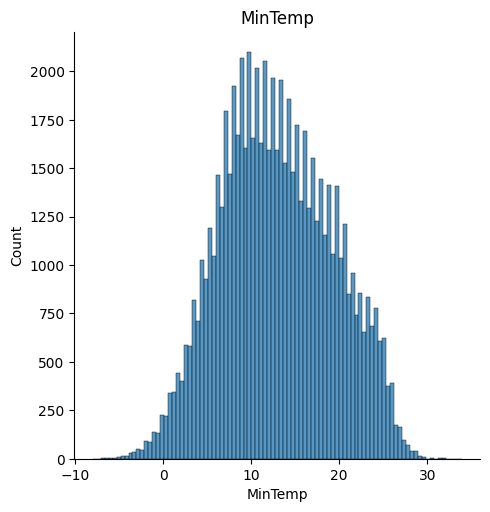

<Figure size 1500x1500 with 0 Axes>

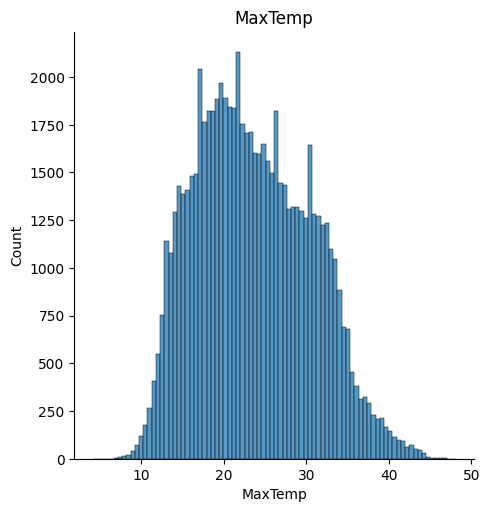

<Figure size 1500x1500 with 0 Axes>

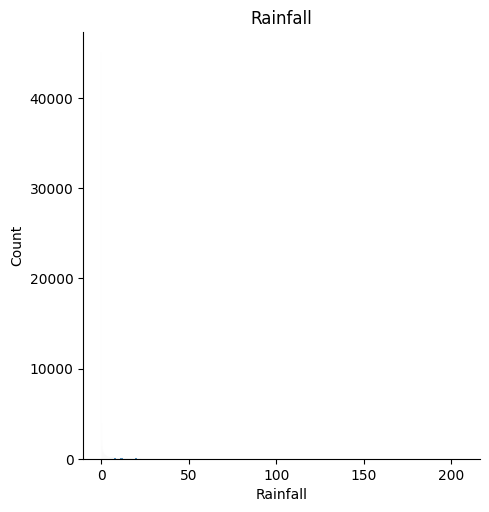

<Figure size 1500x1500 with 0 Axes>

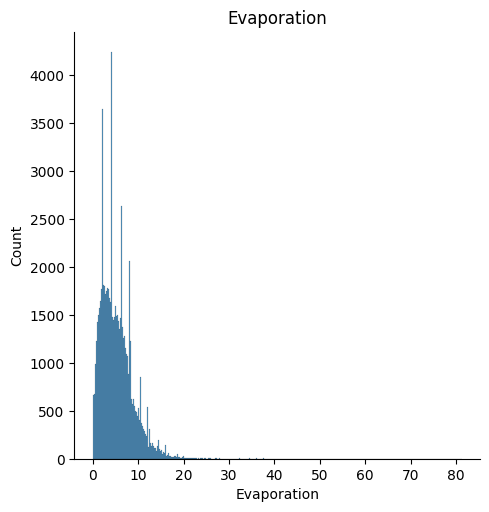

<Figure size 1500x1500 with 0 Axes>

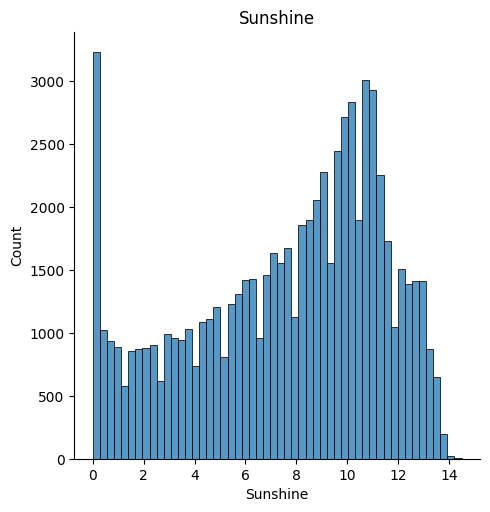

<Figure size 1500x1500 with 0 Axes>

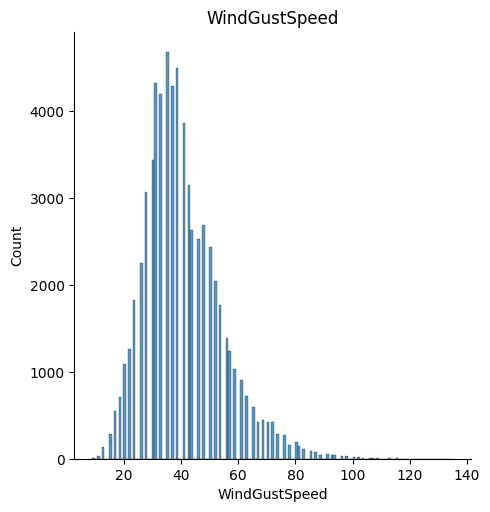

<Figure size 1500x1500 with 0 Axes>

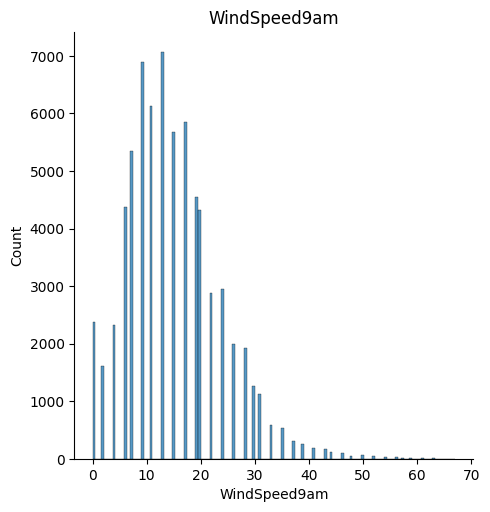

<Figure size 1500x1500 with 0 Axes>

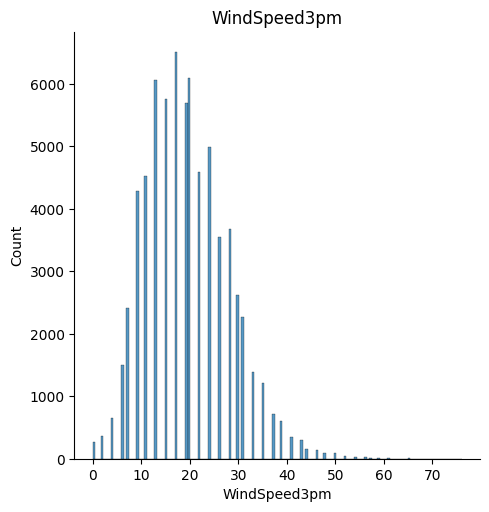

<Figure size 1500x1500 with 0 Axes>

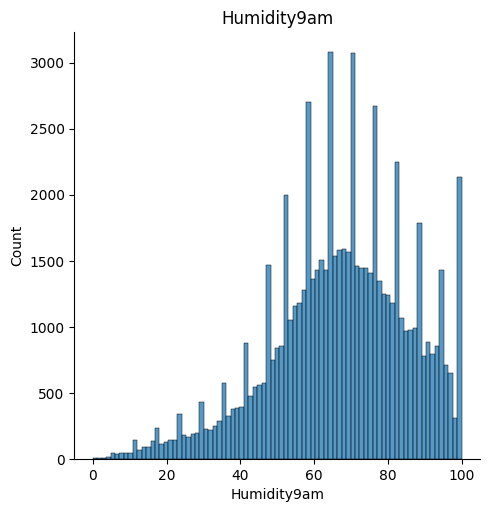

<Figure size 1500x1500 with 0 Axes>

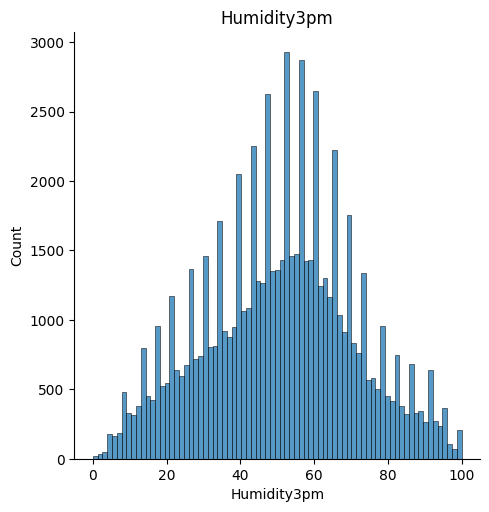

<Figure size 1500x1500 with 0 Axes>

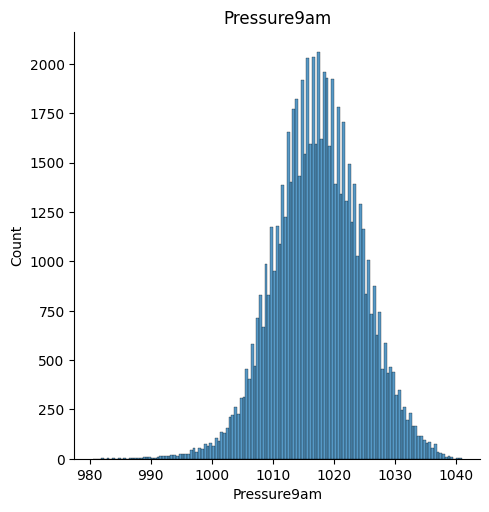

<Figure size 1500x1500 with 0 Axes>

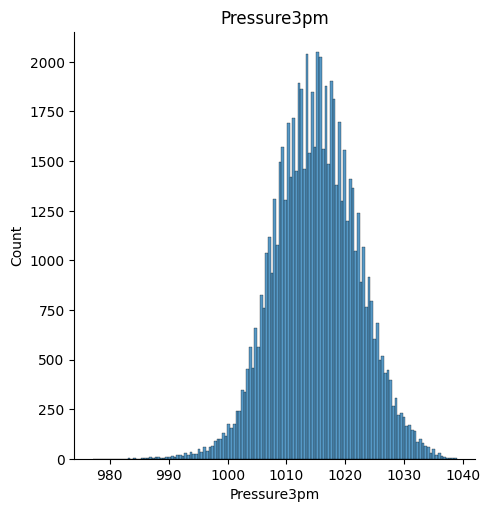

<Figure size 1500x1500 with 0 Axes>

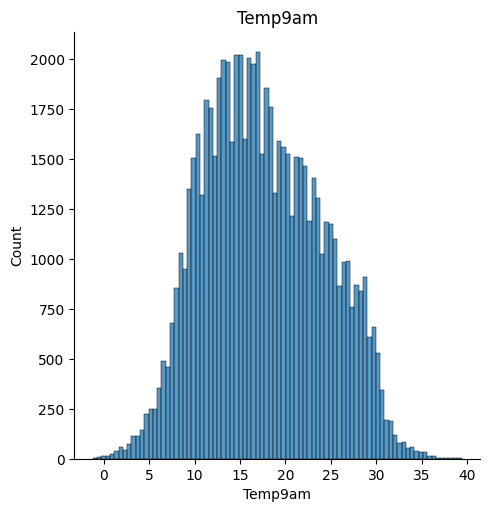

<Figure size 1500x1500 with 0 Axes>

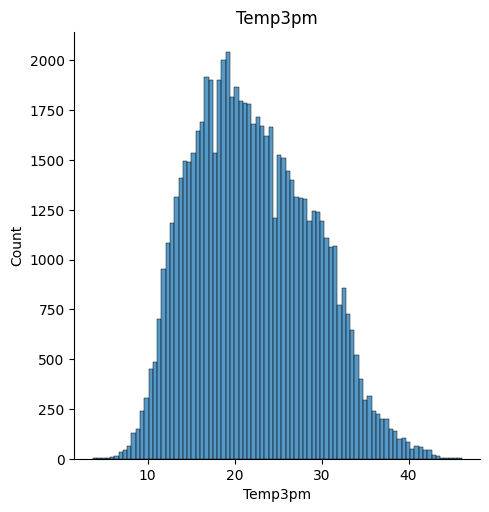

<Figure size 1500x1500 with 0 Axes>

In [108]:
for feature in continous_feature:
  data=df.copy()
  sns.displot(df[feature])
  plt.ylabel("Count")
  plt.xlabel(feature)
  plt.title(feature)
  plt.figure(figsize=(15,15))
  plt.show()

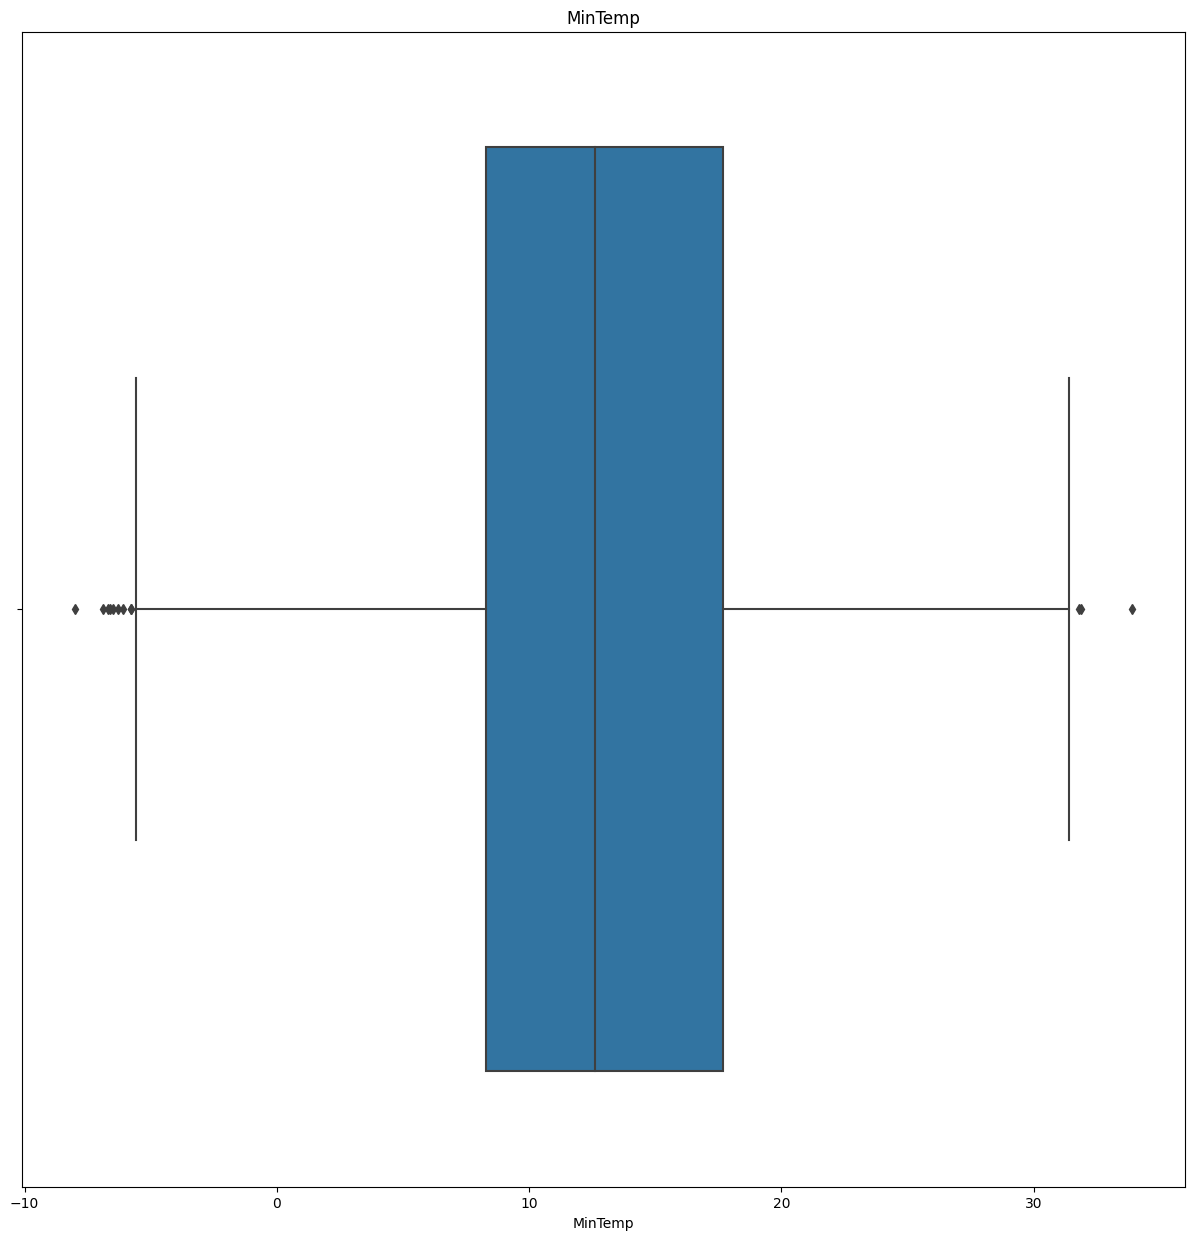

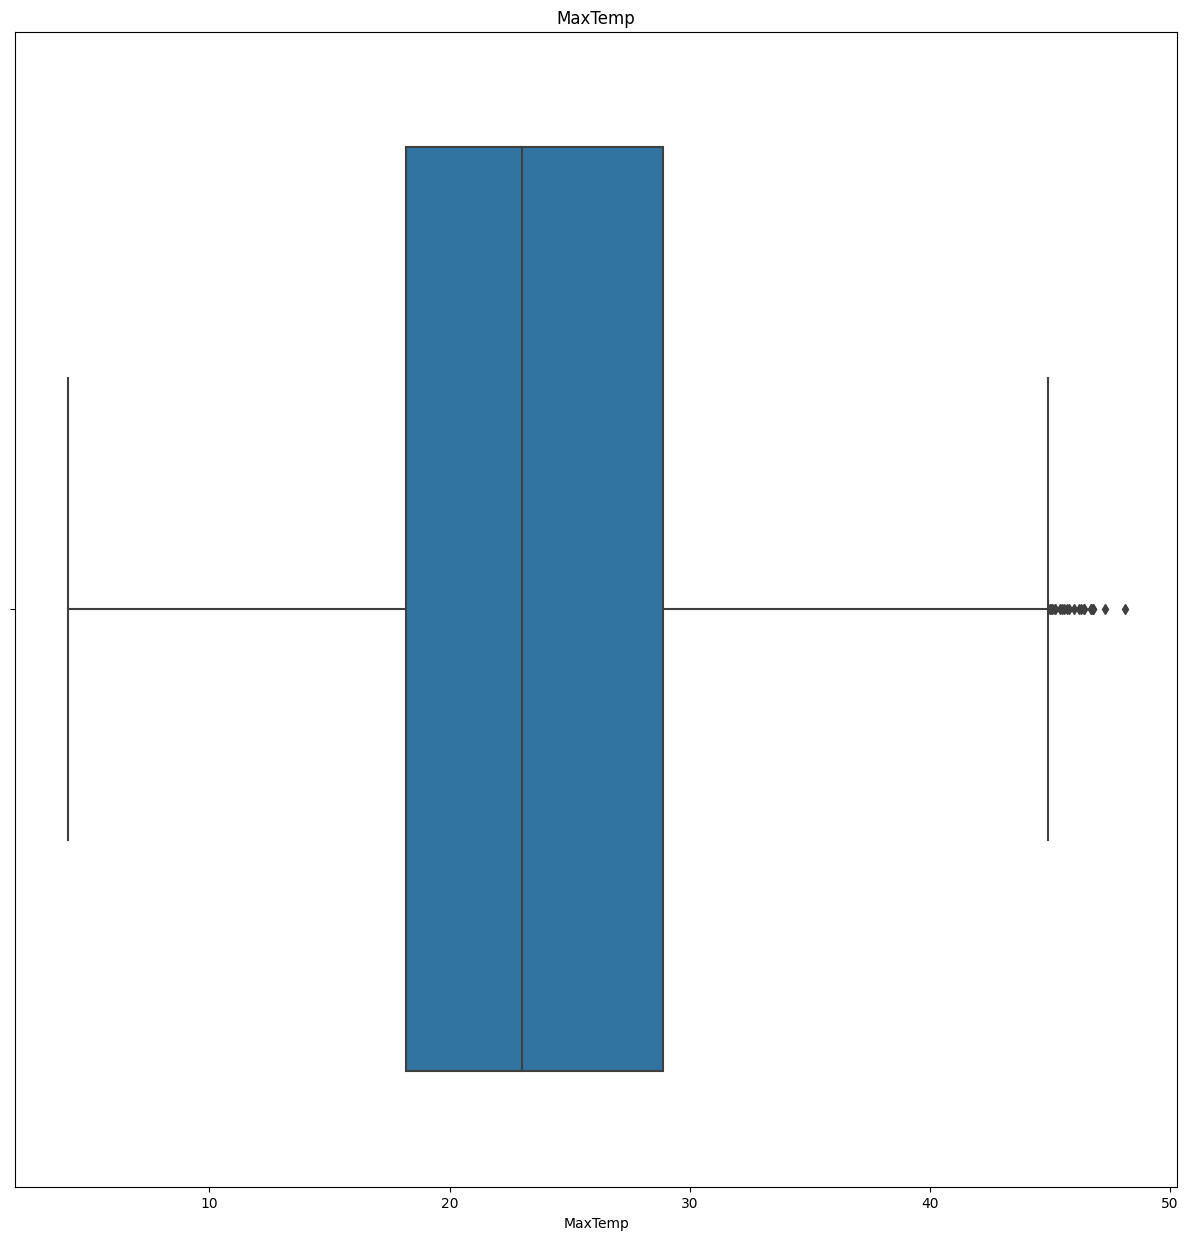

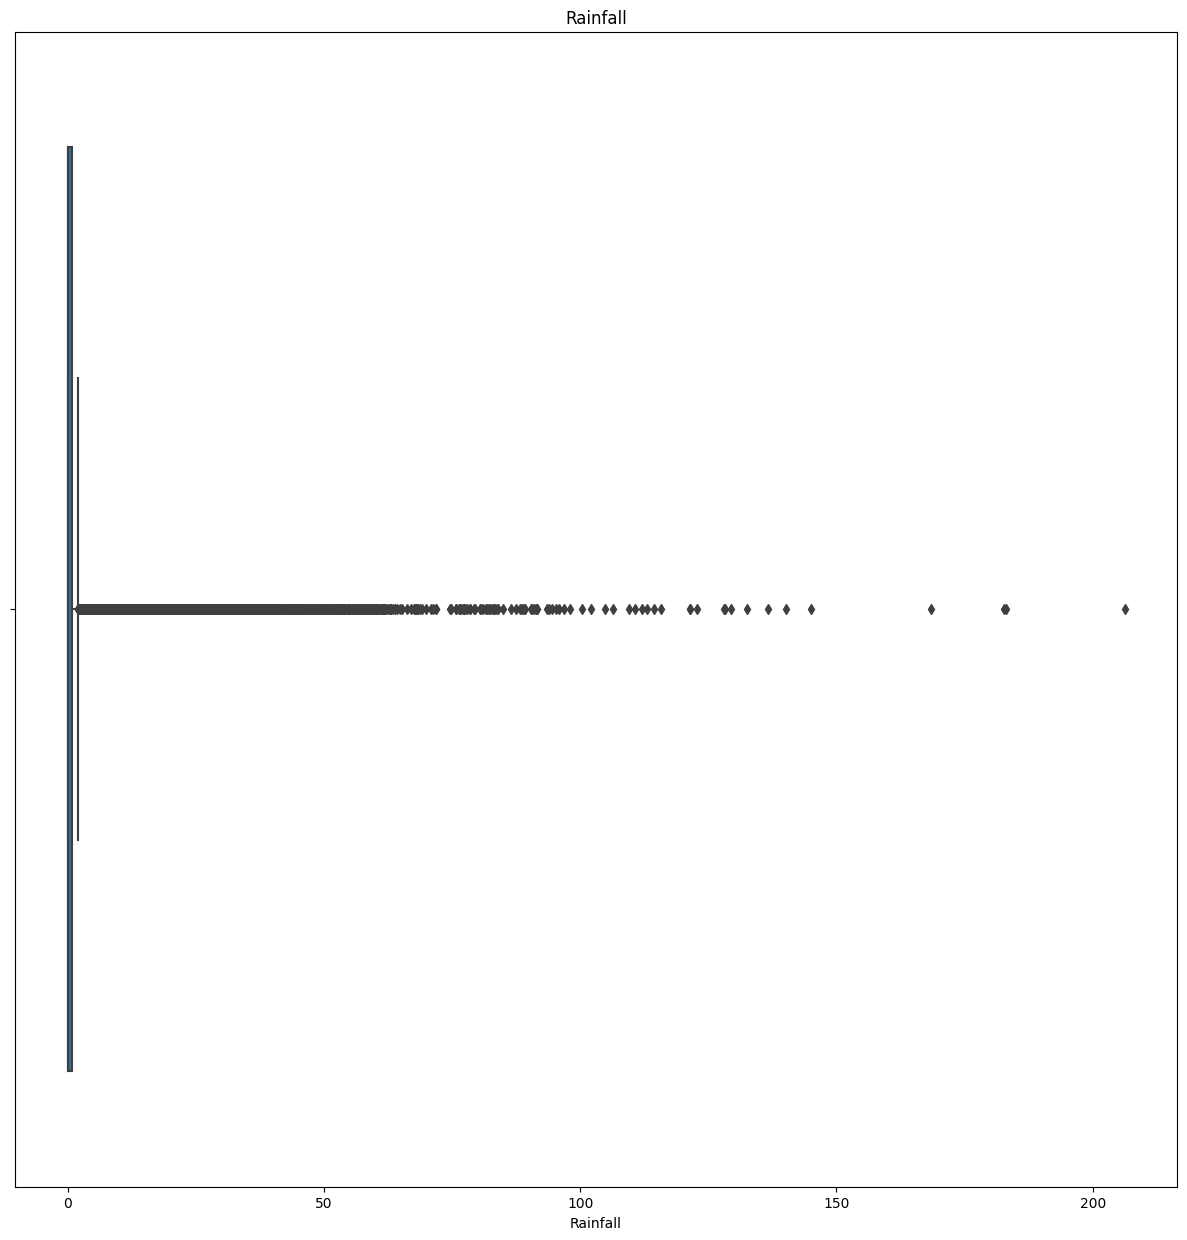

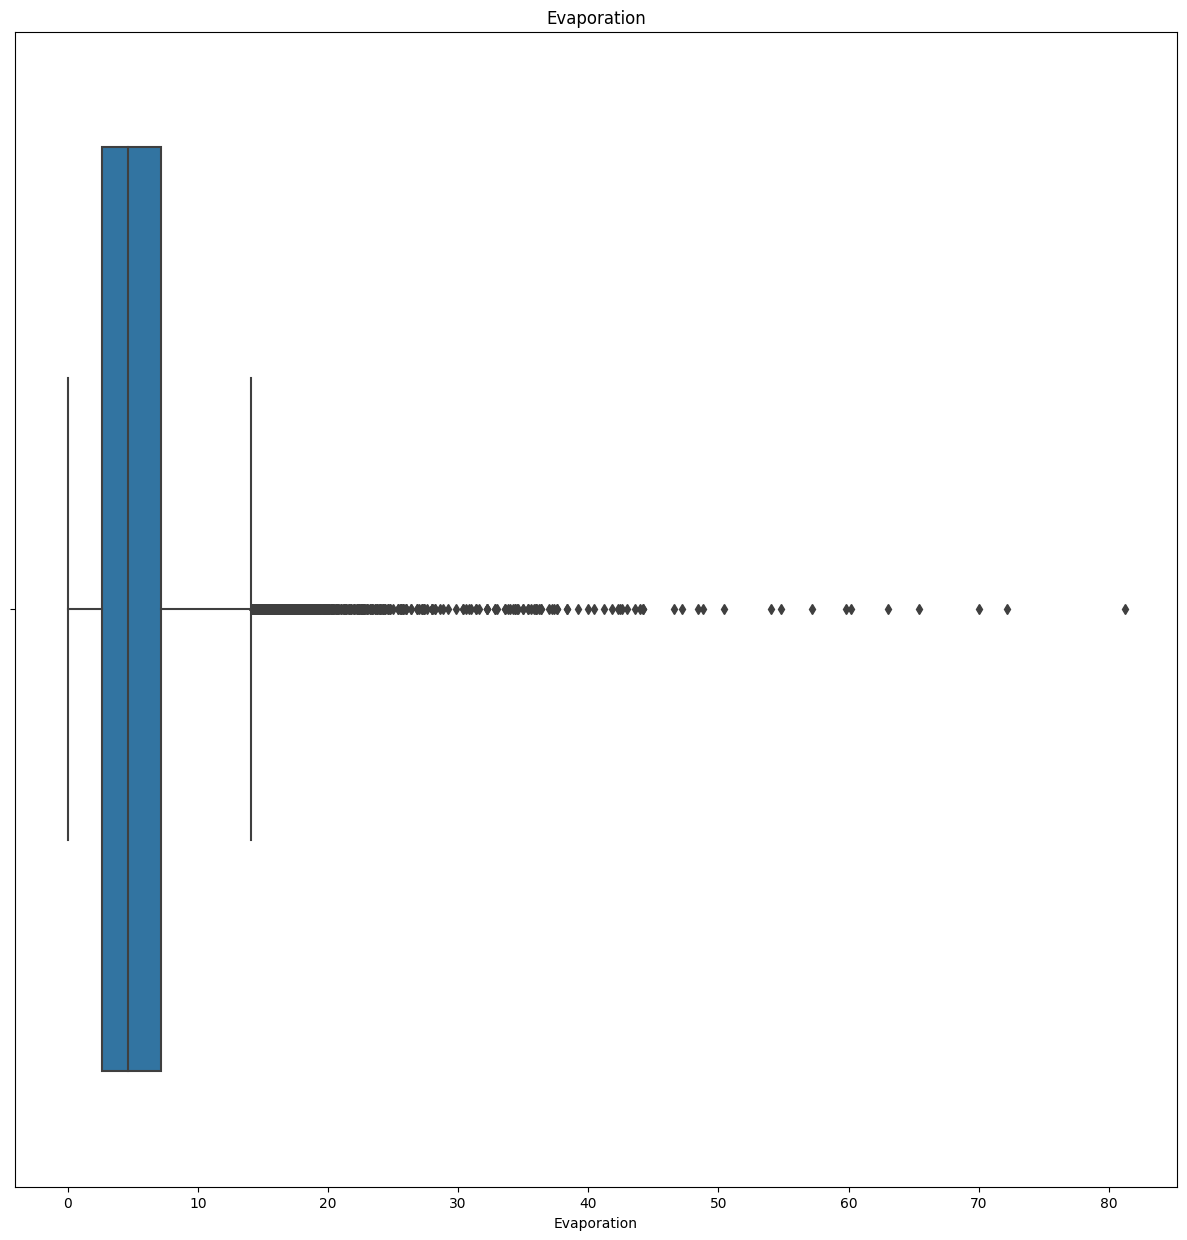

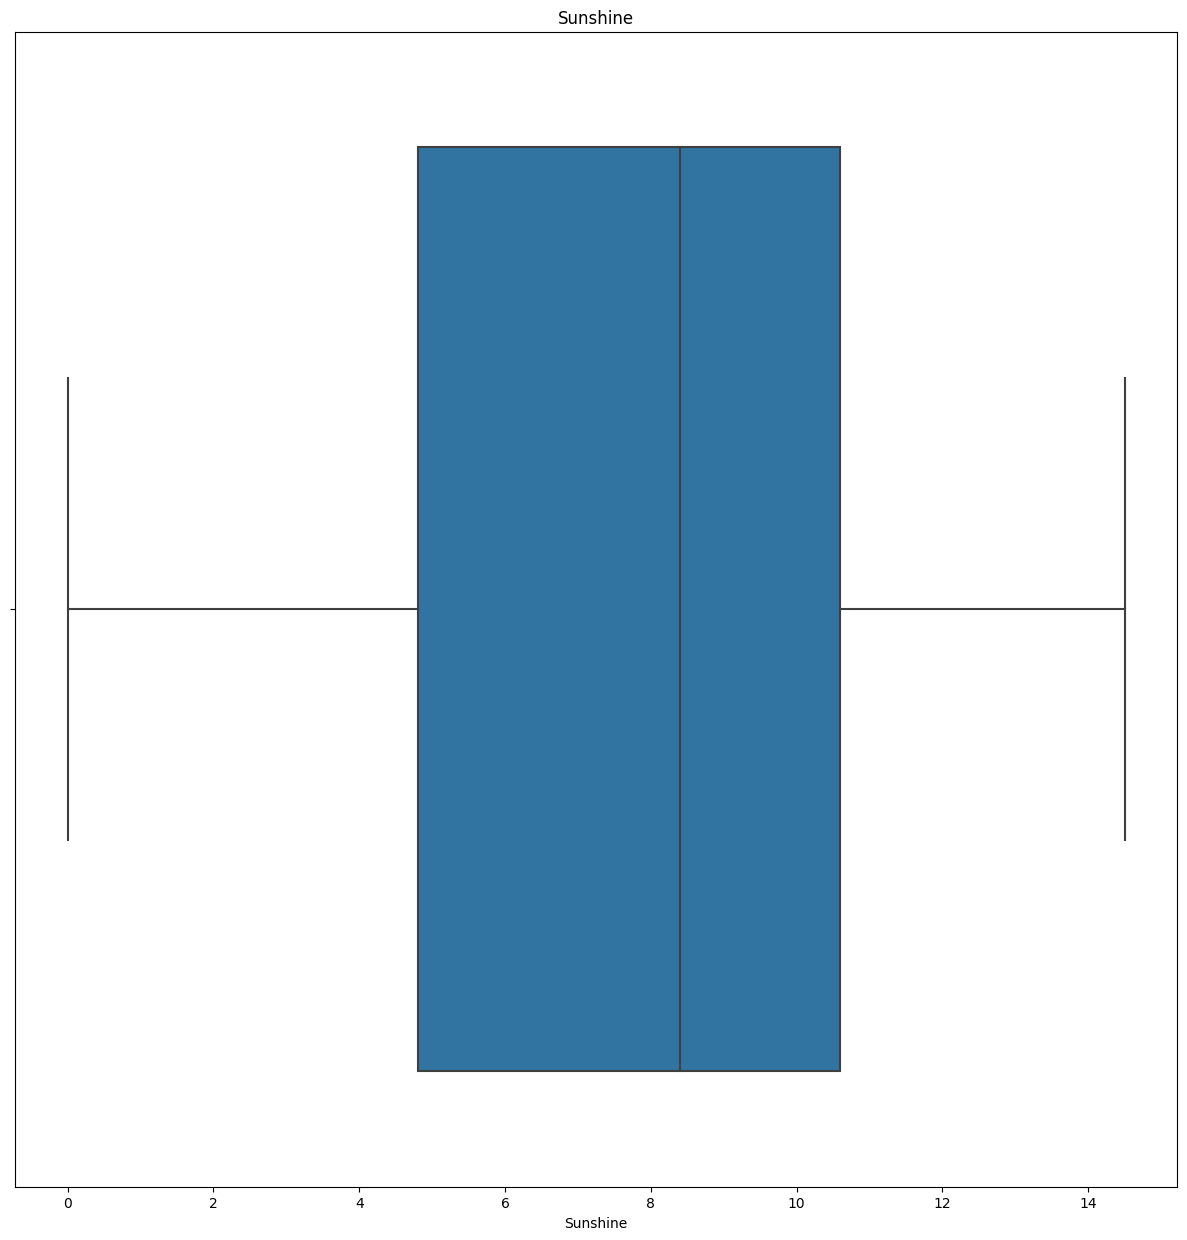

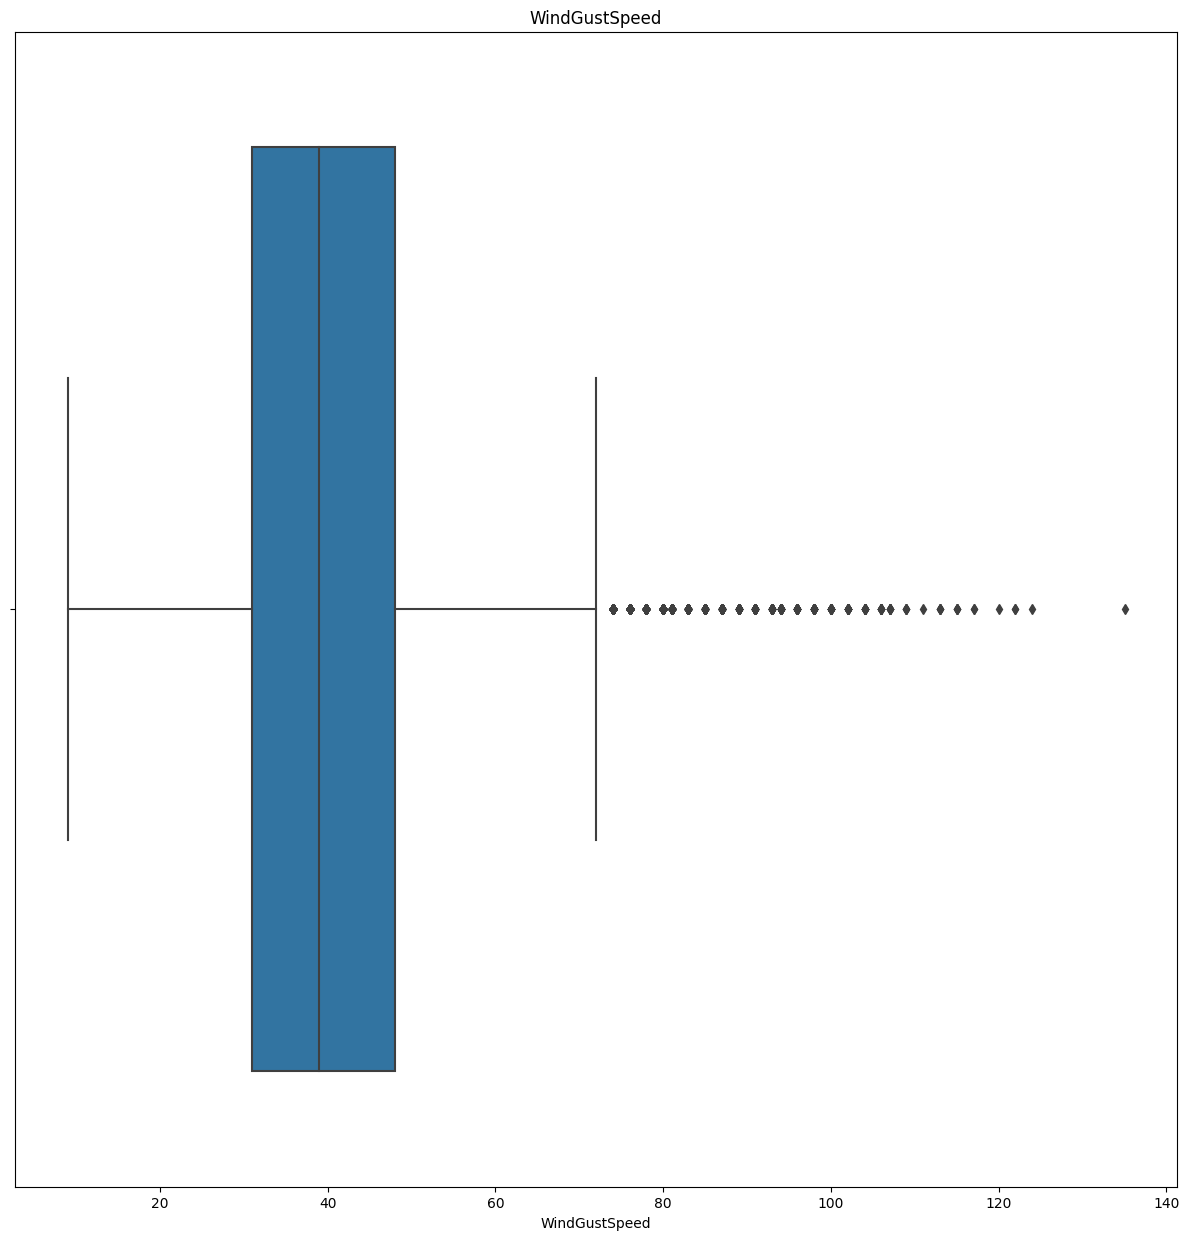

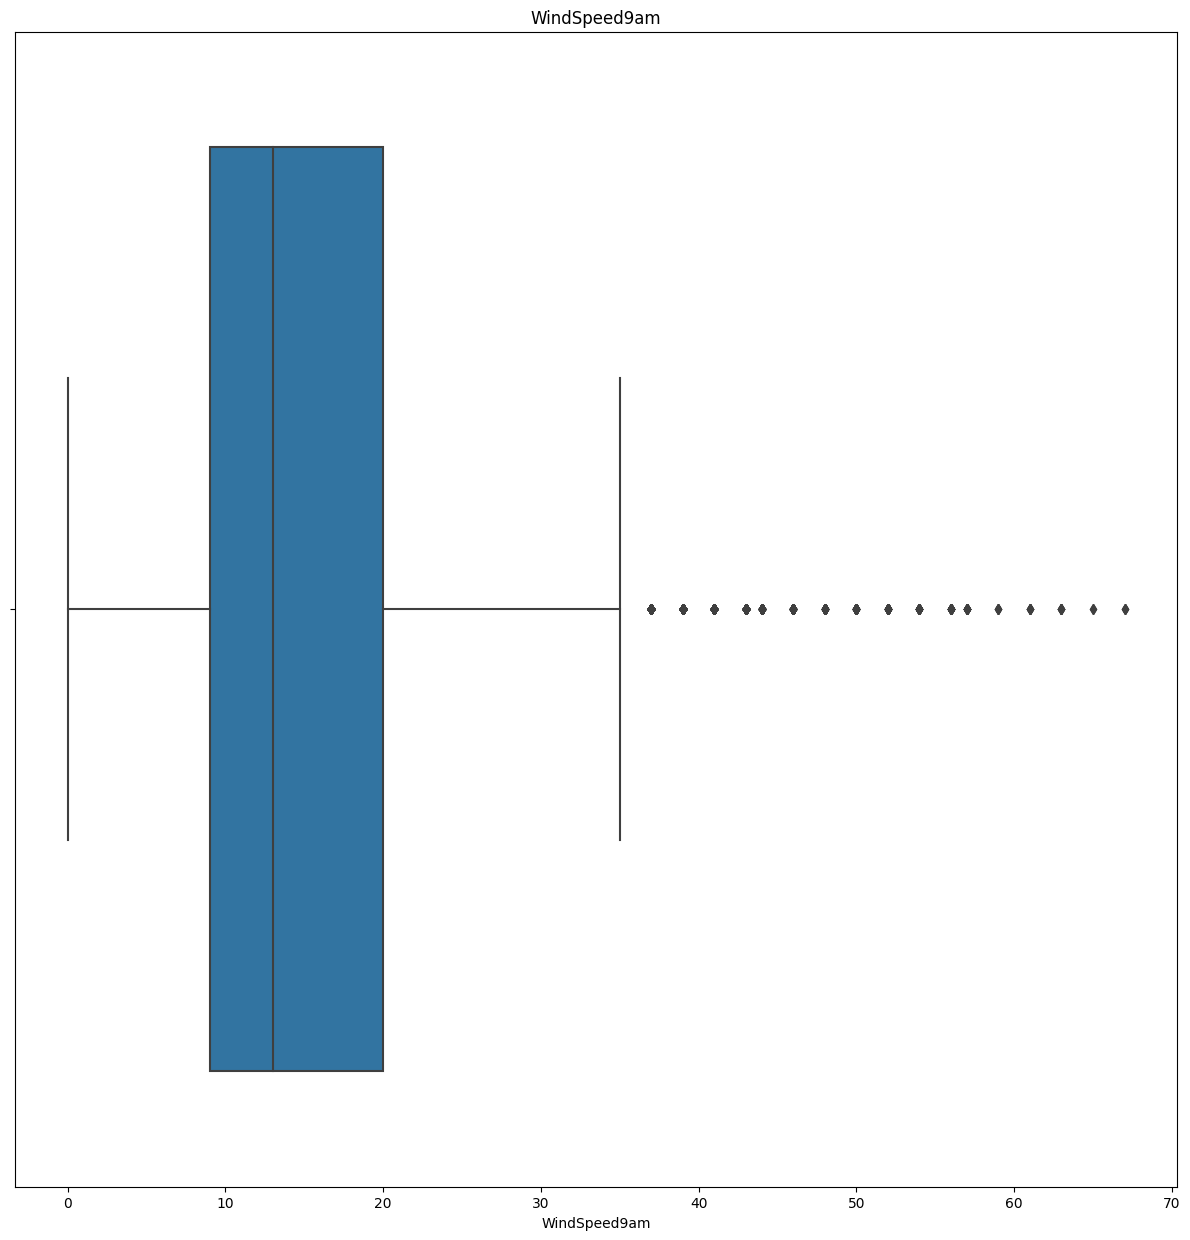

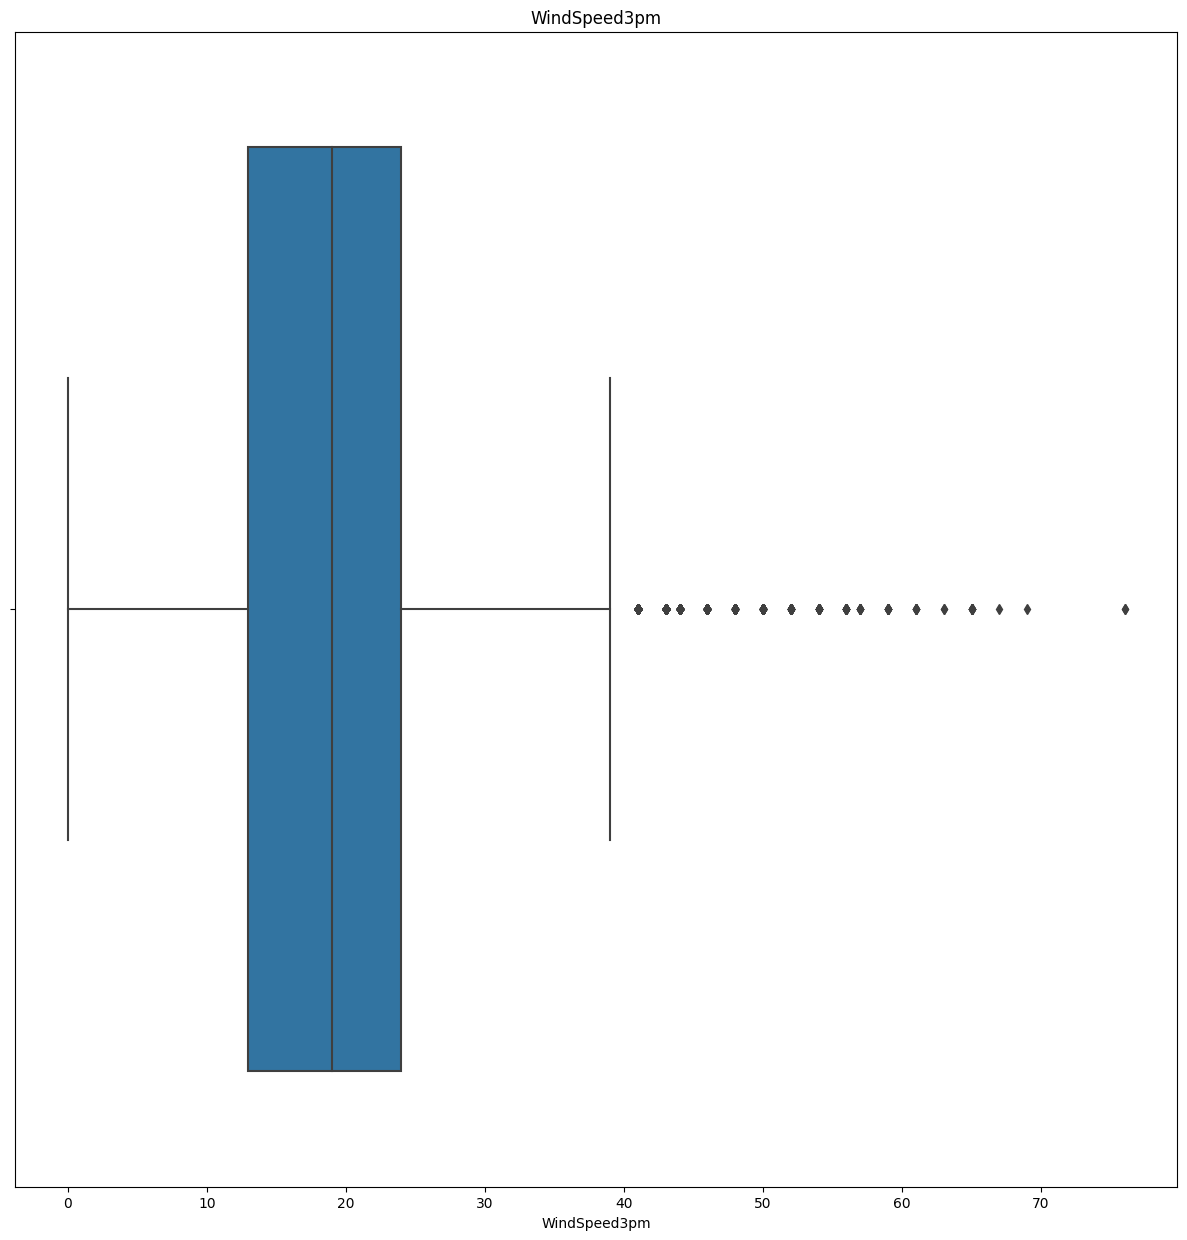

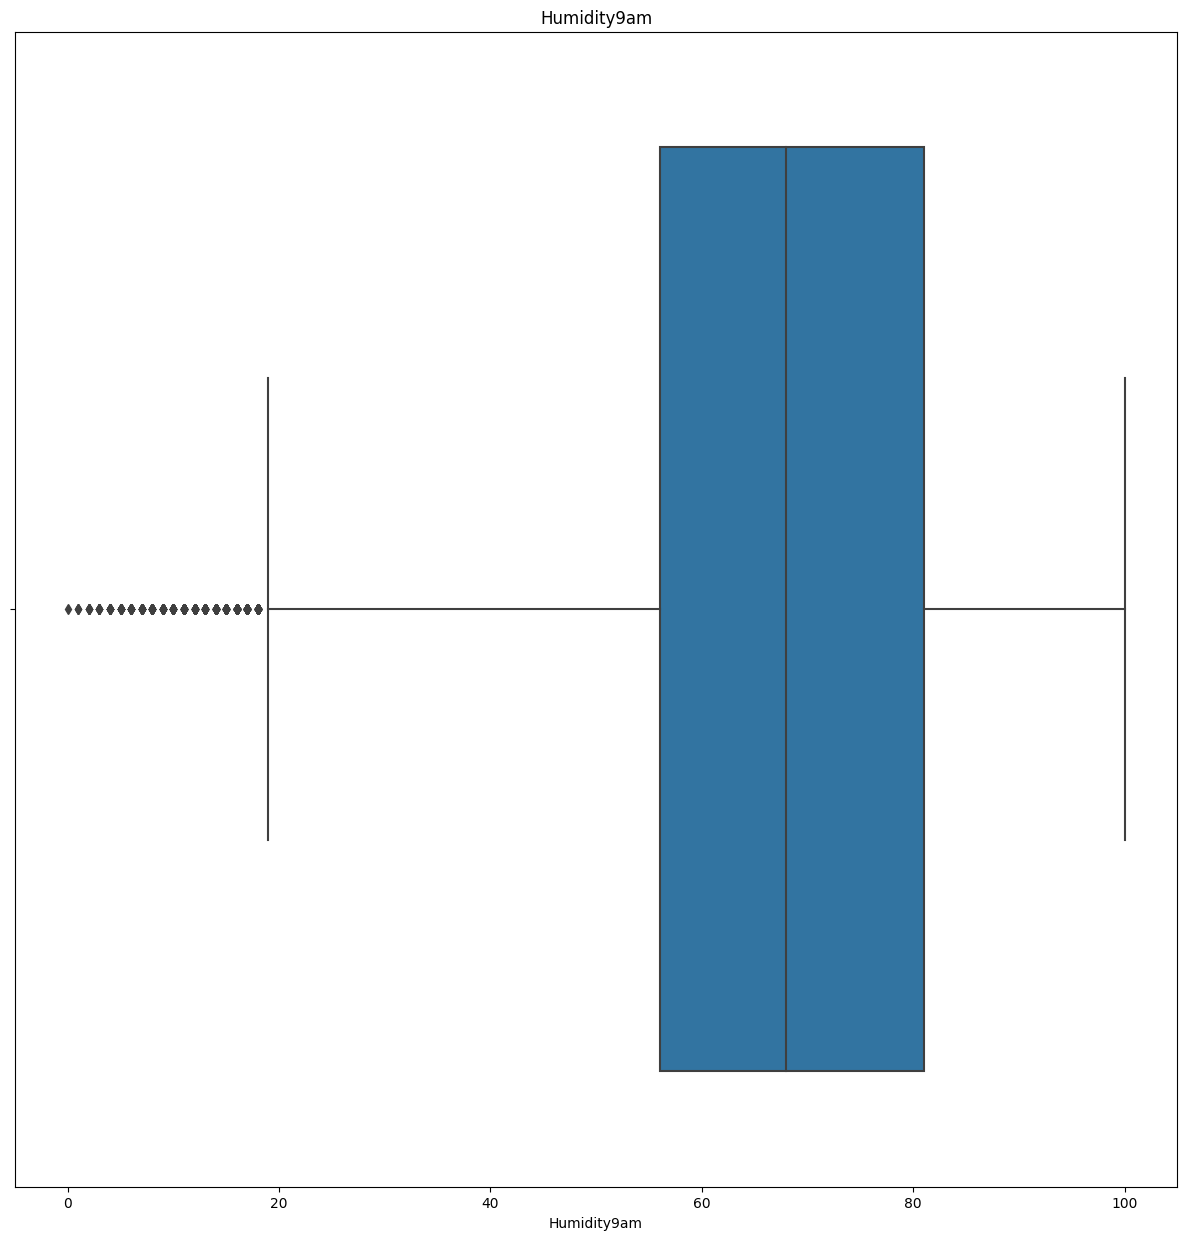

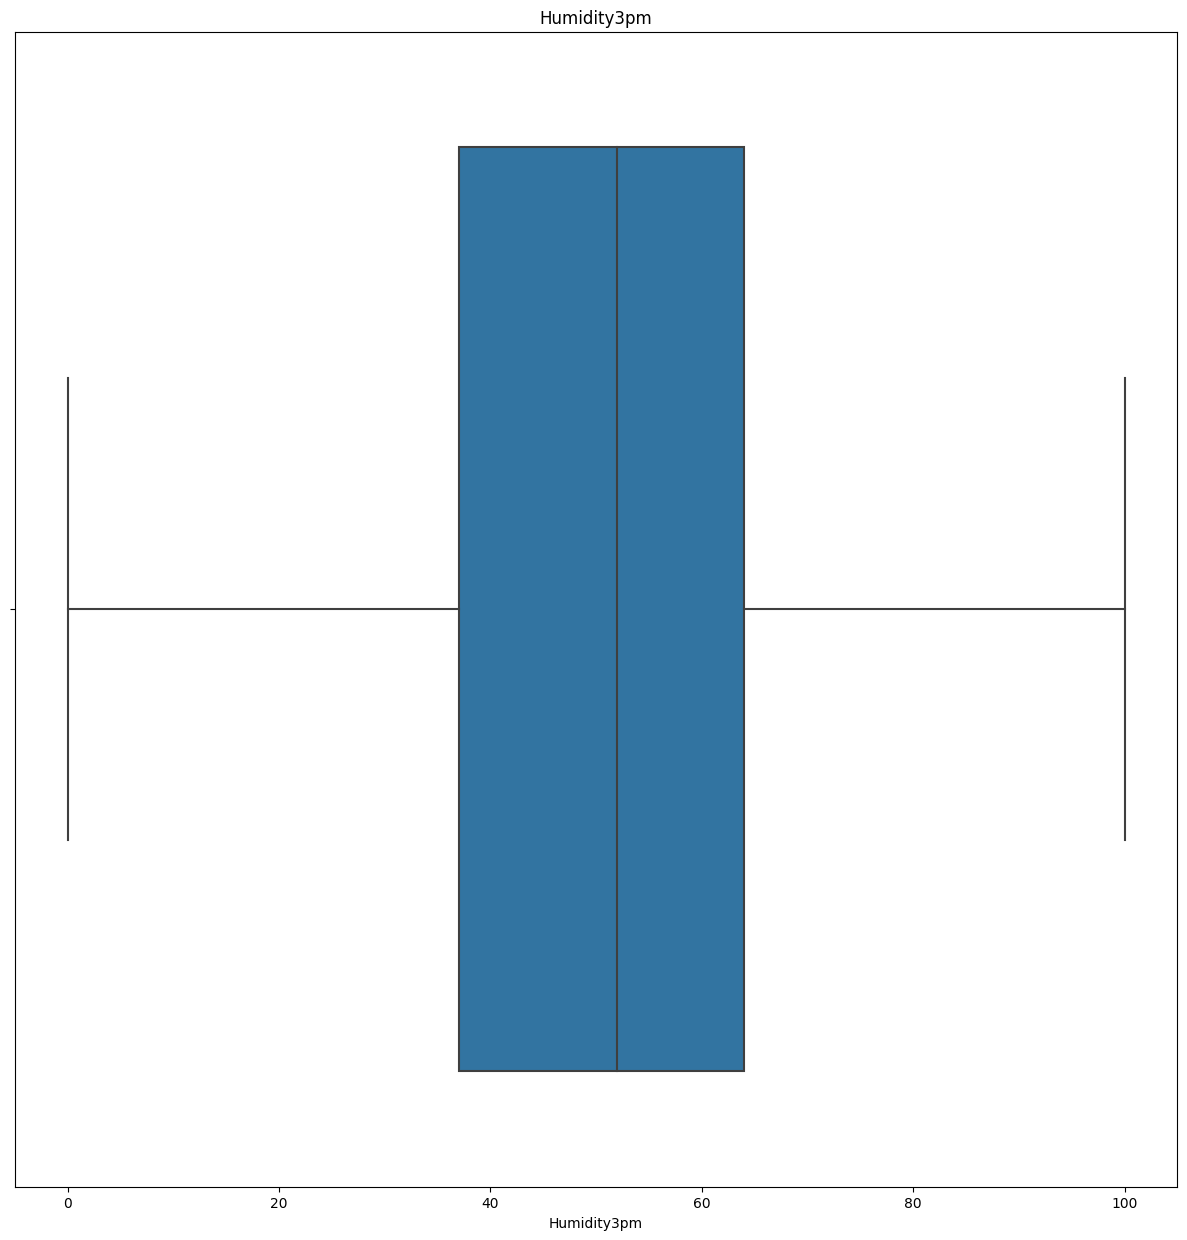

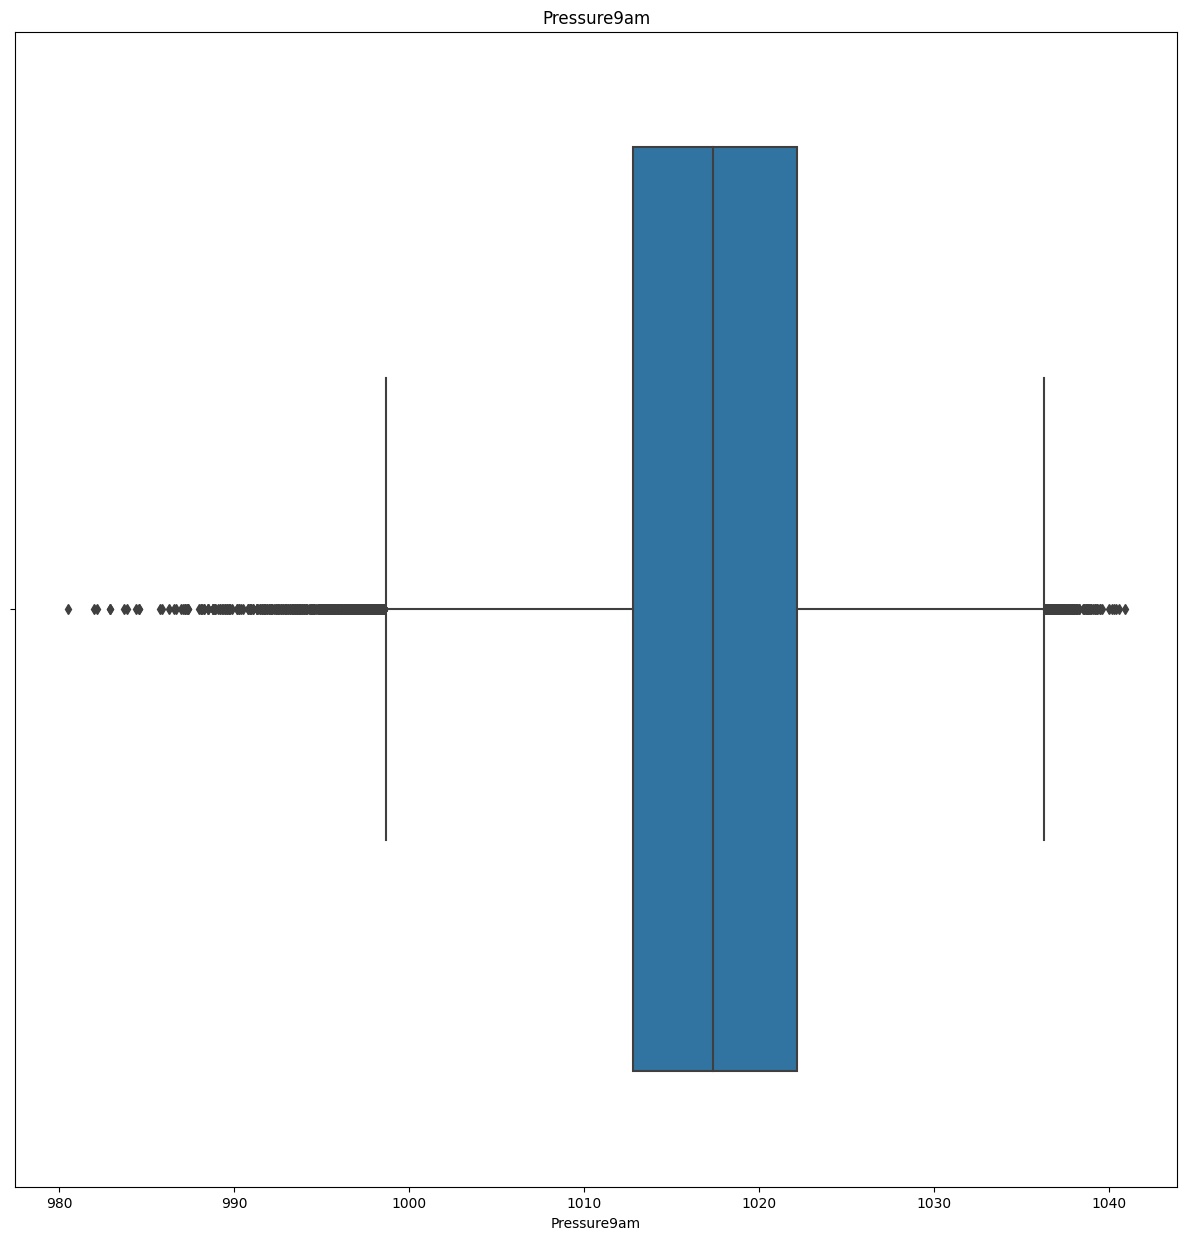

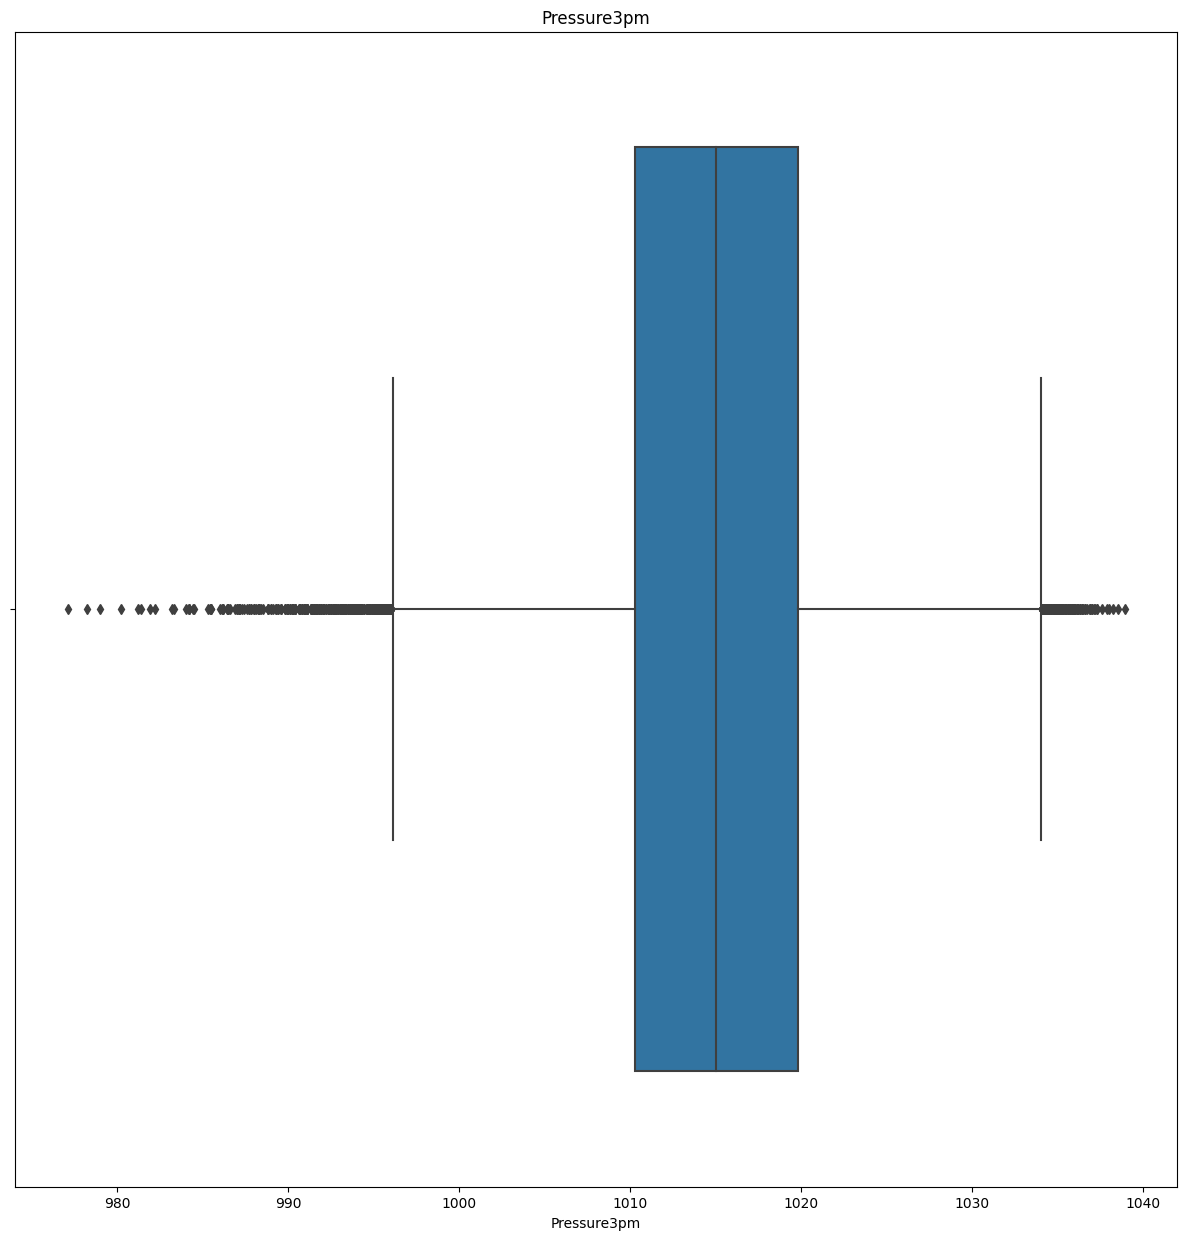

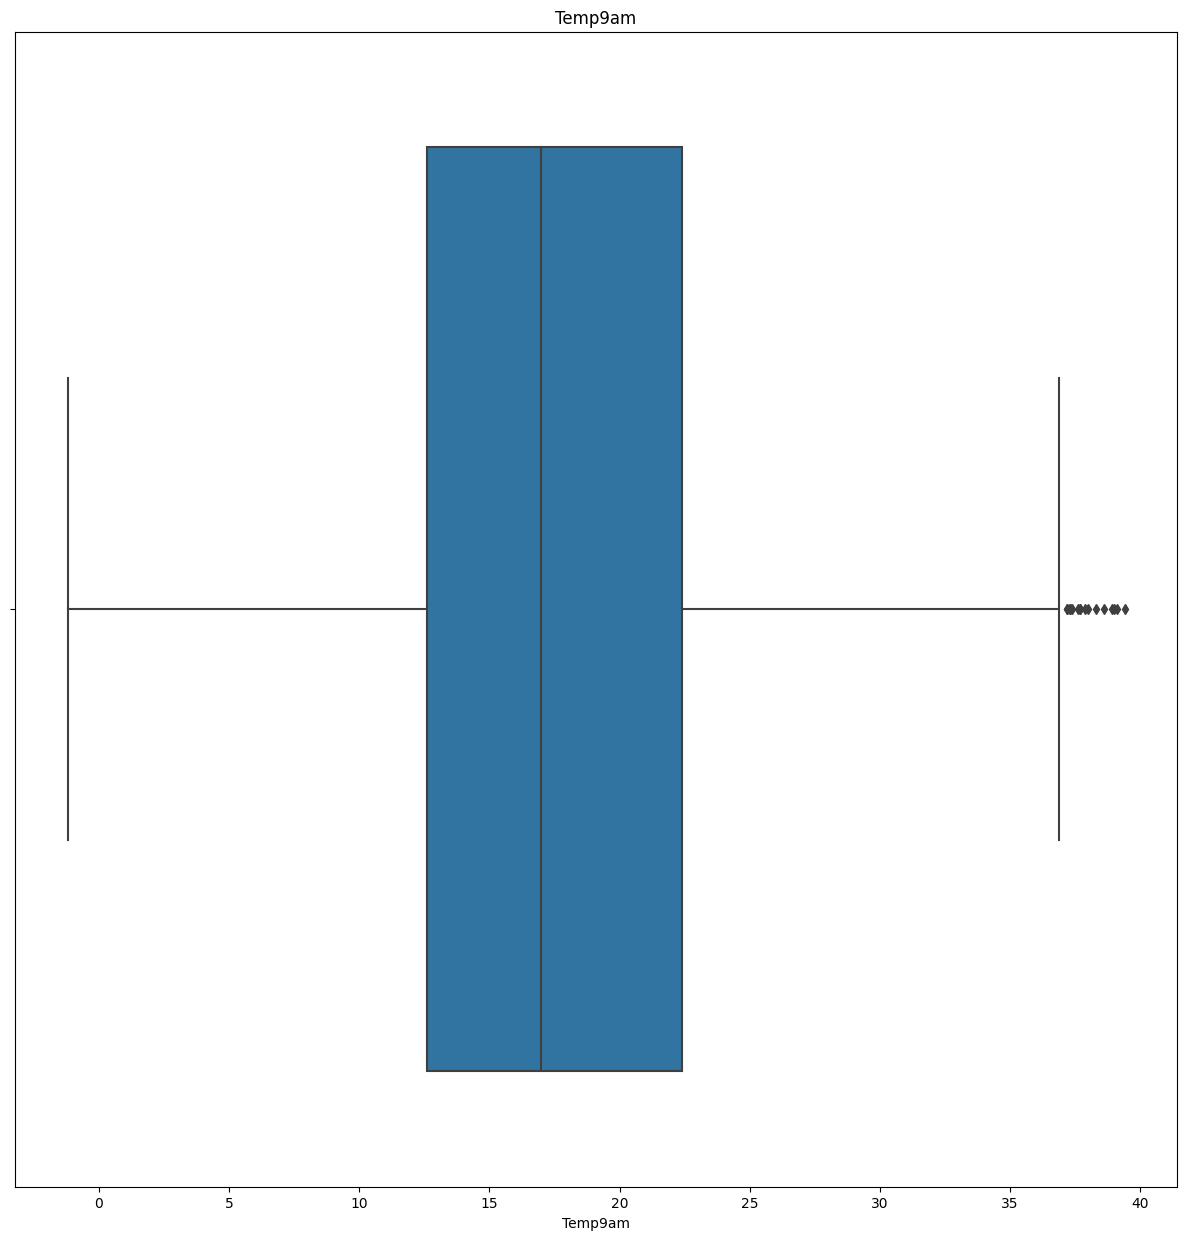

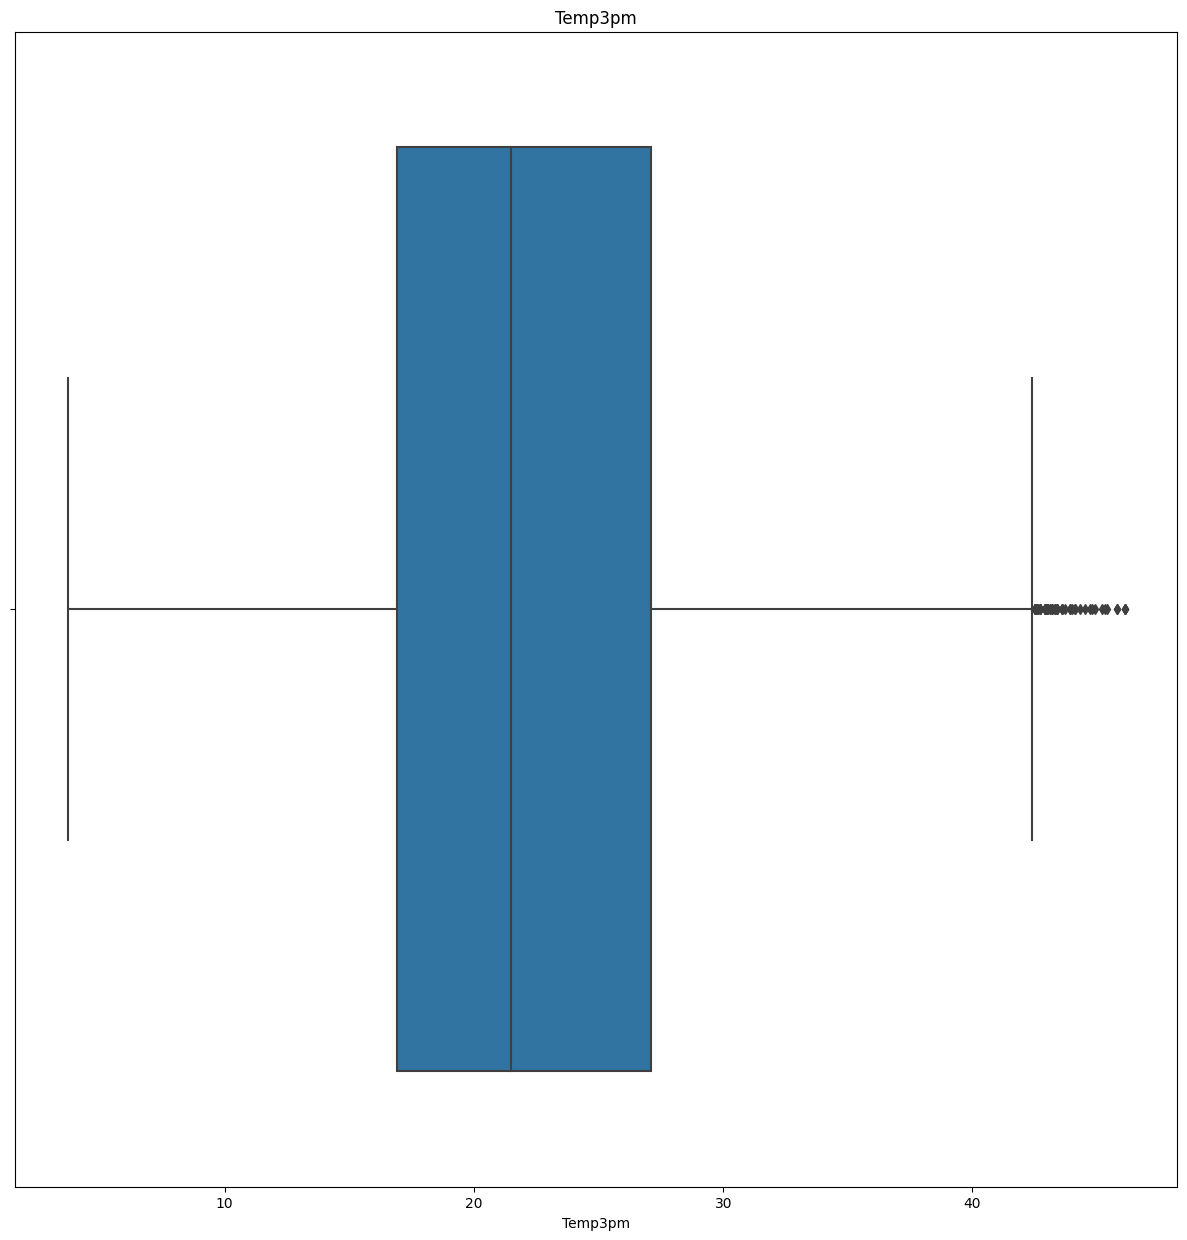

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in  continous_feature:
    data = df.copy()
    plt.figure(figsize=(15, 15))
    sns.boxplot(data=data,x=feature)
    plt.title(feature)
    plt.show()


In [110]:
for features in continous_feature:
  if(df[features].isnull().sum() > 0):
    df[features].fillna(df[features].median())

In [111]:
df.isnull().sum()

Date                0
Location            0
MinTemp           617
MaxTemp           589
Rainfall          911
Evaporation         0
Sunshine            0
WindGustDir      4351
WindGustSpeed    4328
WindDir9am       2617
WindDir3pm        718
WindSpeed9am      215
WindSpeed3pm      432
Humidity9am       913
Humidity3pm      1089
Pressure9am       653
Pressure3pm       660
Cloud9am            0
Cloud3pm            0
Temp9am           652
Temp3pm           847
RainToday         911
RainTomorrow      964
dtype: int64

In [112]:
#categoricalvariable
categorical_feature

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [113]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,01-01-2009,Cobar,SSW,ENE,SW,No,No
6050,02-01-2009,Cobar,S,SSE,SSE,No,No
6051,03-01-2009,Cobar,SE,NaN,N,No,No
6052,04-01-2009,Cobar,NNE,NNE,NNW,No,No
6053,05-01-2009,Cobar,WNW,WNW,WSW,No,No
...,...,...,...,...,...,...,...
142298,20-06-2017,Darwin,ENE,SE,NE,No,No
142299,21-06-2017,Darwin,E,SE,SE,No,No
142300,22-06-2017,Darwin,E,E,W,No,No
142301,23-06-2017,Darwin,ESE,SE,NNW,No,No


In [114]:
len(df["Location"].unique())

29

In [115]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6051,03-01-2009,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,NaN,7.0,NaN,1011.6,8.0,1.0,NaN,32.7,No,No
6052,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No


In [116]:
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"],drop_first=True)
df["RainToday"] = pd.get_dummies(df["RainToday"],drop_first=True)

In [117]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6051,03-01-2009,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,NaN,7.0,NaN,1011.6,8.0,1.0,NaN,32.7,0,0
6052,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0


In [118]:
df["RainTomorrow"].value_counts()

0    55485
1    15897
Name: RainTomorrow, dtype: int64

In [119]:
from sklearn import preprocessing 
labelencoder = preprocessing.LabelEncoder()

In [120]:
df["Location"] = labelencoder.fit_transform(df["Location"])

In [121]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,01-01-2009,6,SSW,ENE,SW,0,0
6050,02-01-2009,6,S,SSE,SSE,0,0
6051,03-01-2009,6,SE,NaN,N,0,0
6052,04-01-2009,6,NNE,NNE,NNW,0,0
6053,05-01-2009,6,WNW,WNW,WSW,0,0
...,...,...,...,...,...,...,...
142298,20-06-2017,9,ENE,SE,NE,0,0
142299,21-06-2017,9,E,SE,SE,0,0
142300,22-06-2017,9,E,E,W,0,0
142301,23-06-2017,9,ESE,SE,NNW,0,0


In [122]:
df["Location"] = labelencoder.fit_transform(df["Location"])
df["WindGustDir"] = labelencoder.fit_transform(df["WindGustDir"])
df["WindDir9am"] = labelencoder.fit_transform(df["WindDir9am"])
df["WindDir3pm"] = labelencoder.fit_transform(df["WindDir3pm"])

In [123]:
df["Date"] = pd.to_datetime(df["Date"],format="%Y-%m-%dT",errors ="coerce")

In [124]:
df["Date_month"]=df["Date"].dt.month
df["Date_day"]=df["Date"].dt.day
df["Date_year"]=df["Date"].dt.year

In [125]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day,Date_year
6049,NaT,6,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,1004.4,2.0,5.0,26.6,33.4,0,0,NaN,NaN,NaN
6050,NaT,6,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,1012.1,1.0,1.0,20.3,27.0,0,0,NaN,NaN,NaN
6051,NaT,6,15.5,34.1,0.0,12.6,13.3,9,30.0,16,...,1011.6,8.0,1.0,NaN,32.7,0,0,NaN,NaN,NaN
6052,NaT,6,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,1009.2,1.0,6.0,28.7,34.9,0,0,NaN,NaN,NaN
6053,NaT,6,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,1009.1,1.0,5.0,29.1,35.6,0,0,NaN,NaN,NaN


<ipython-input-126-4f479a2399f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


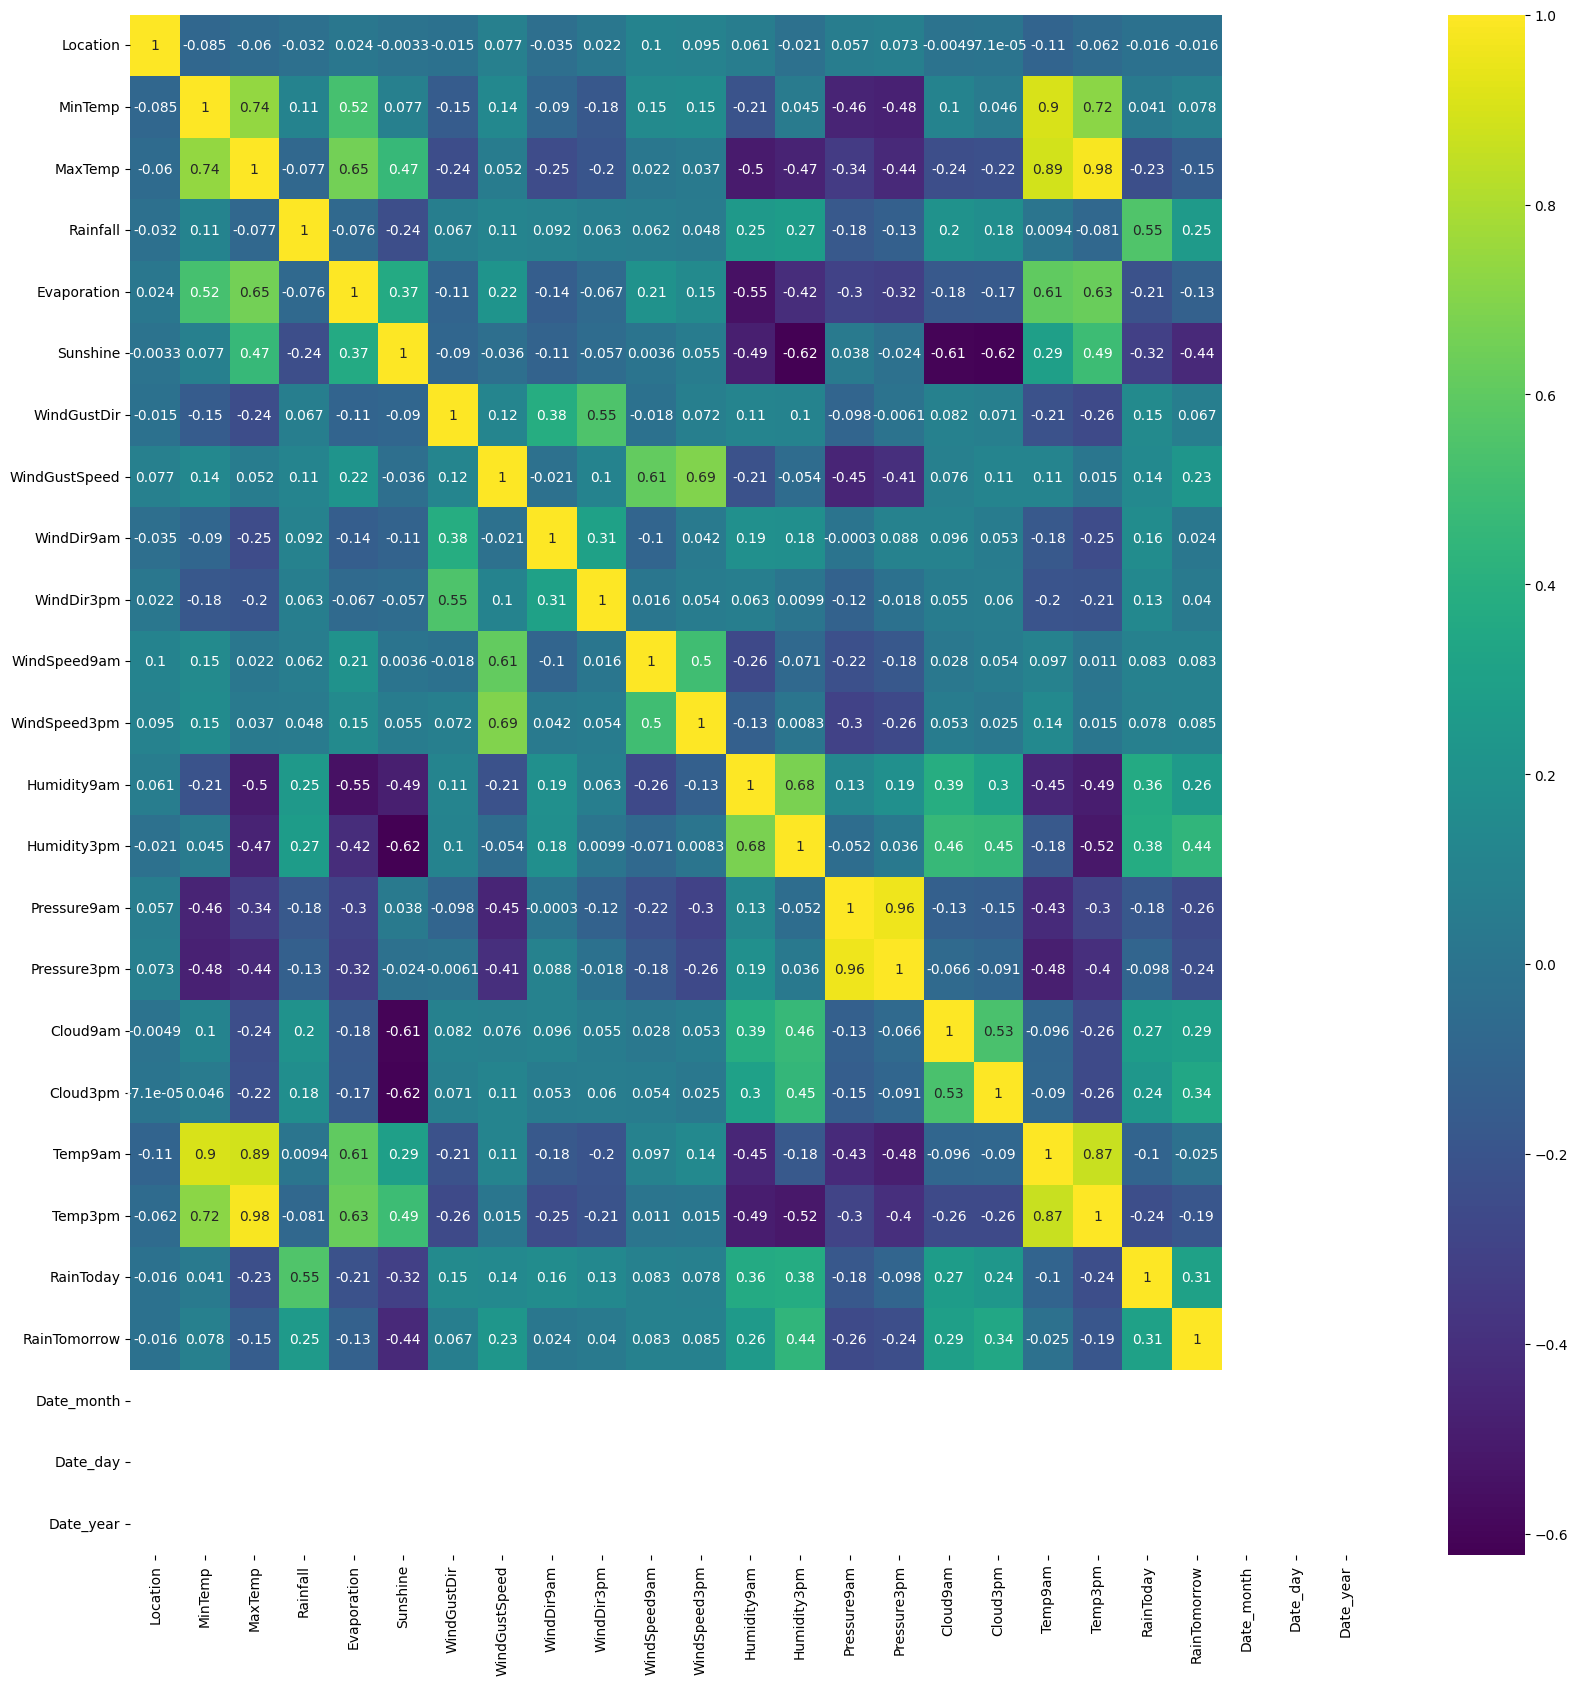

In [126]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g =sns.heatmap(corrmat,annot=True,cmap="viridis")

In [127]:
continous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

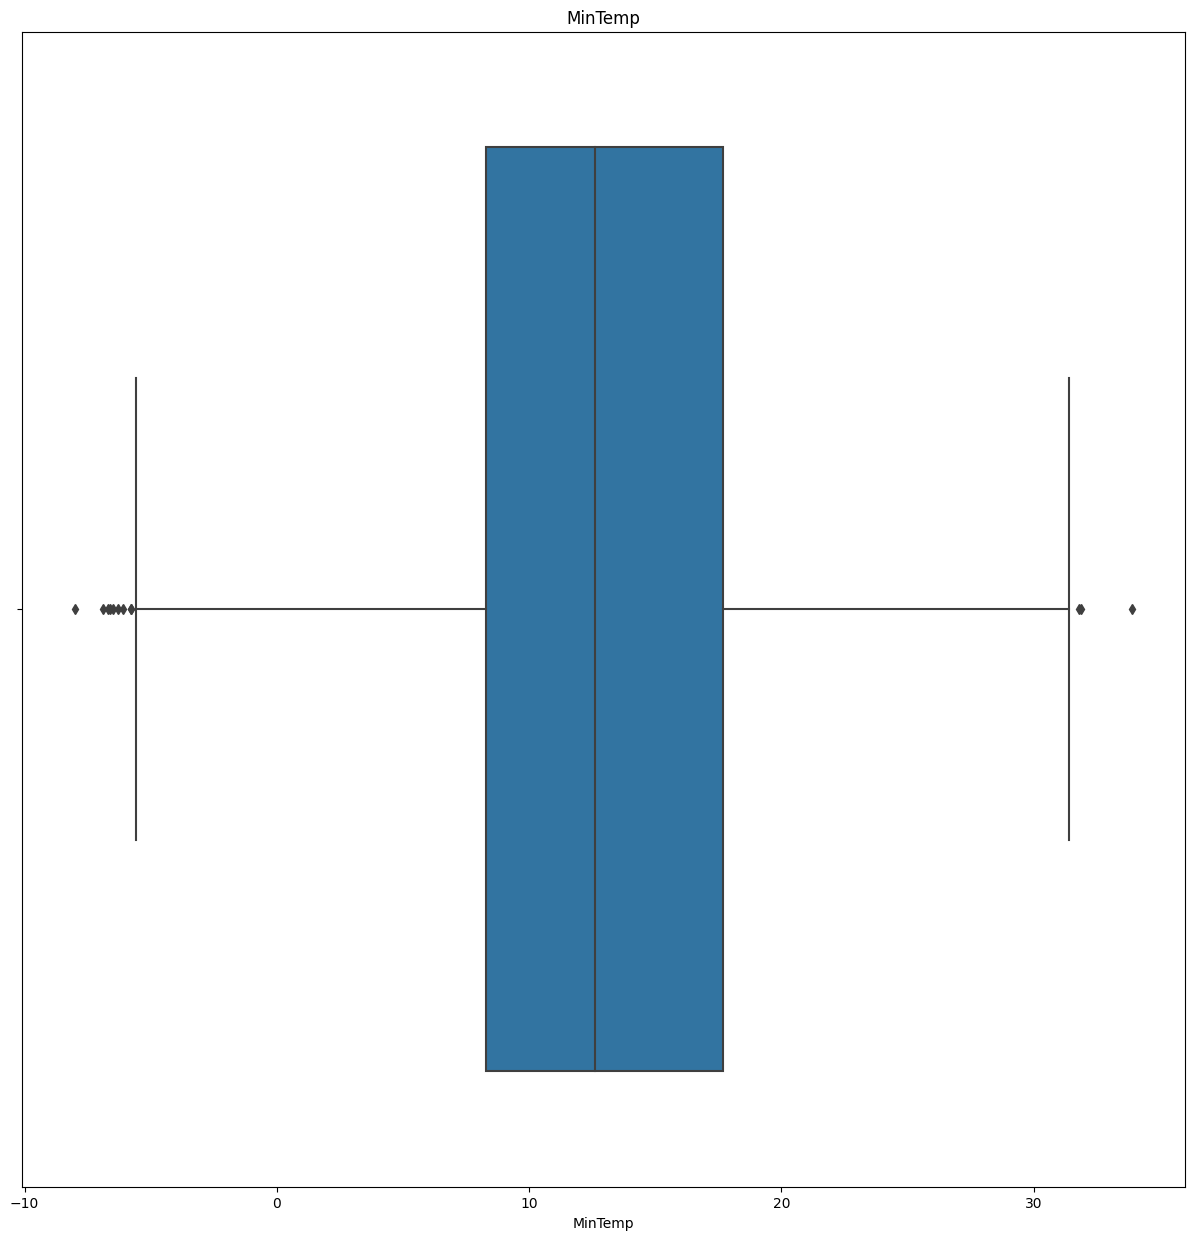

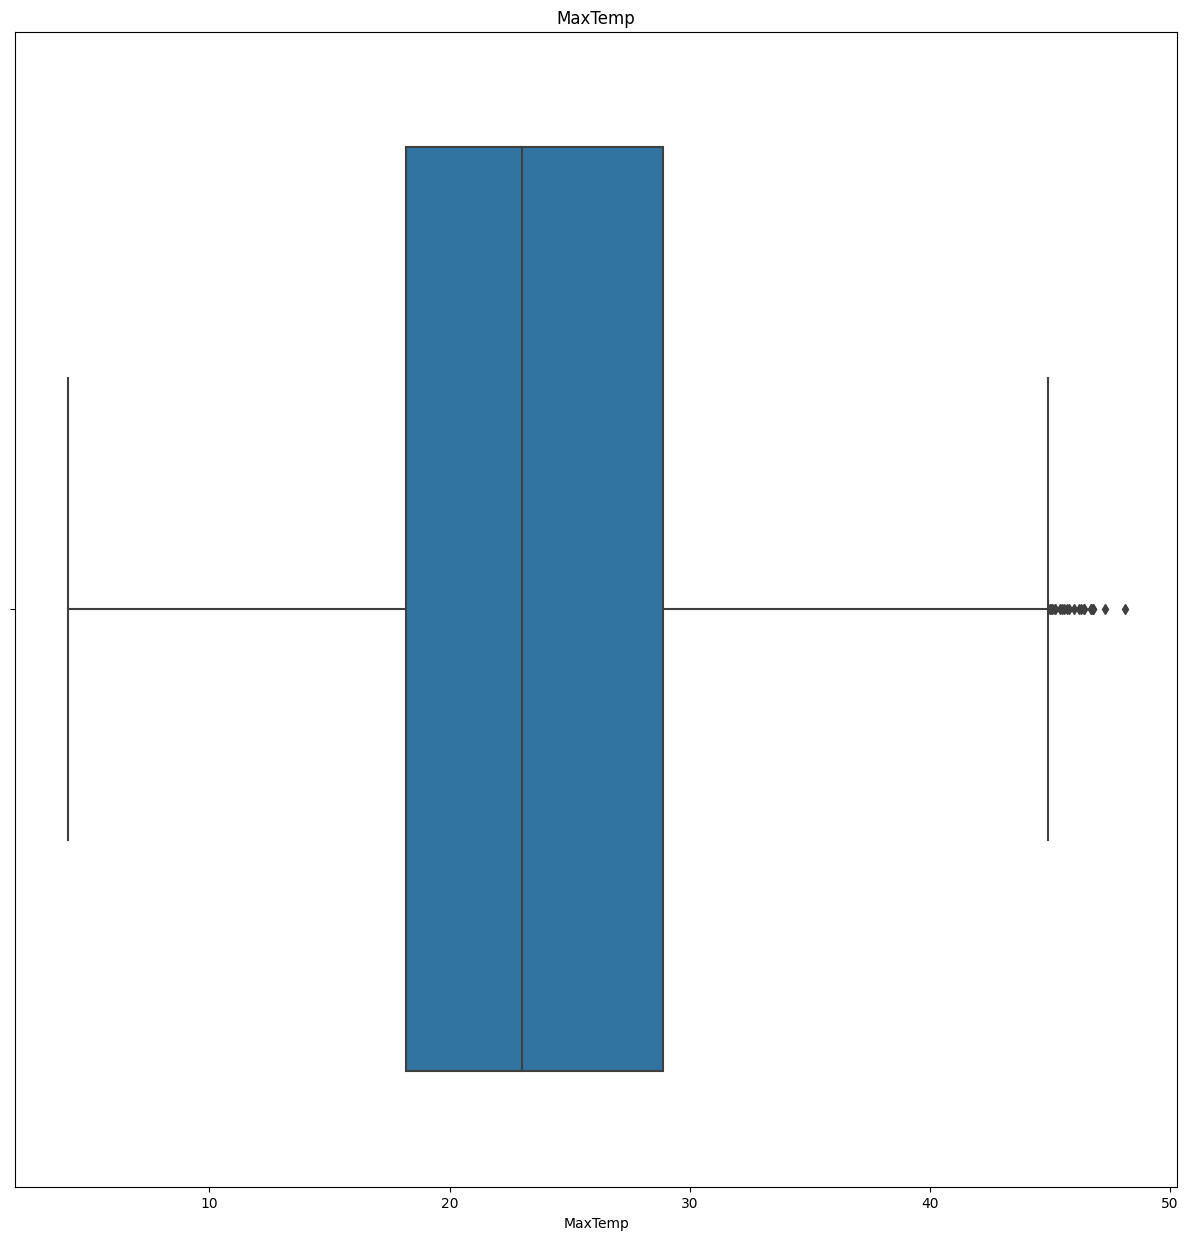

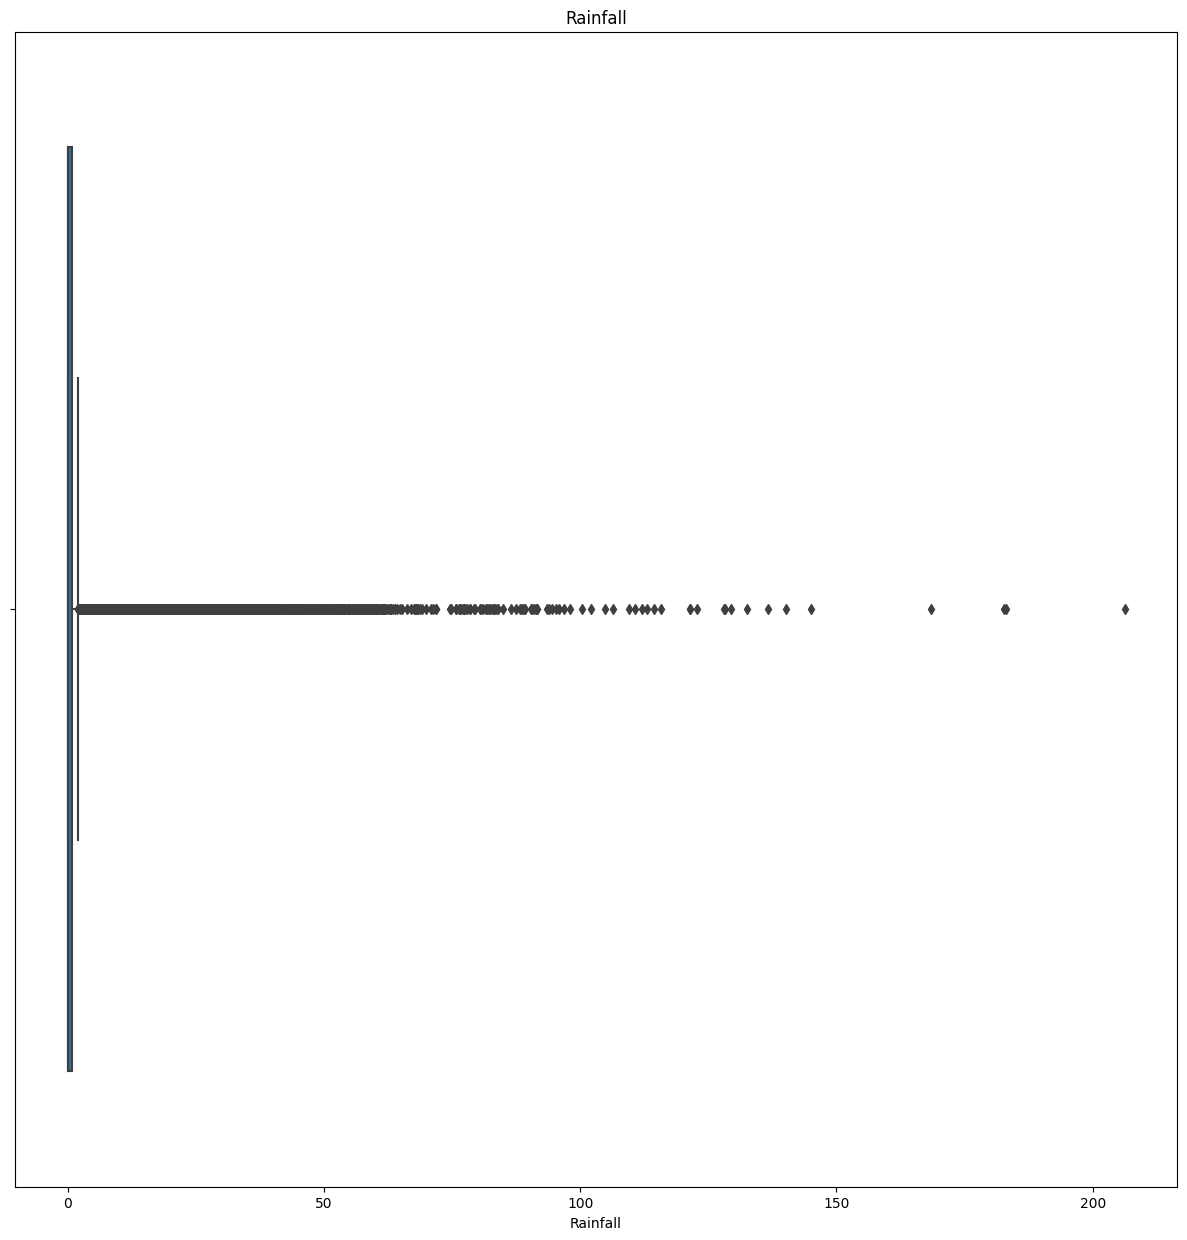

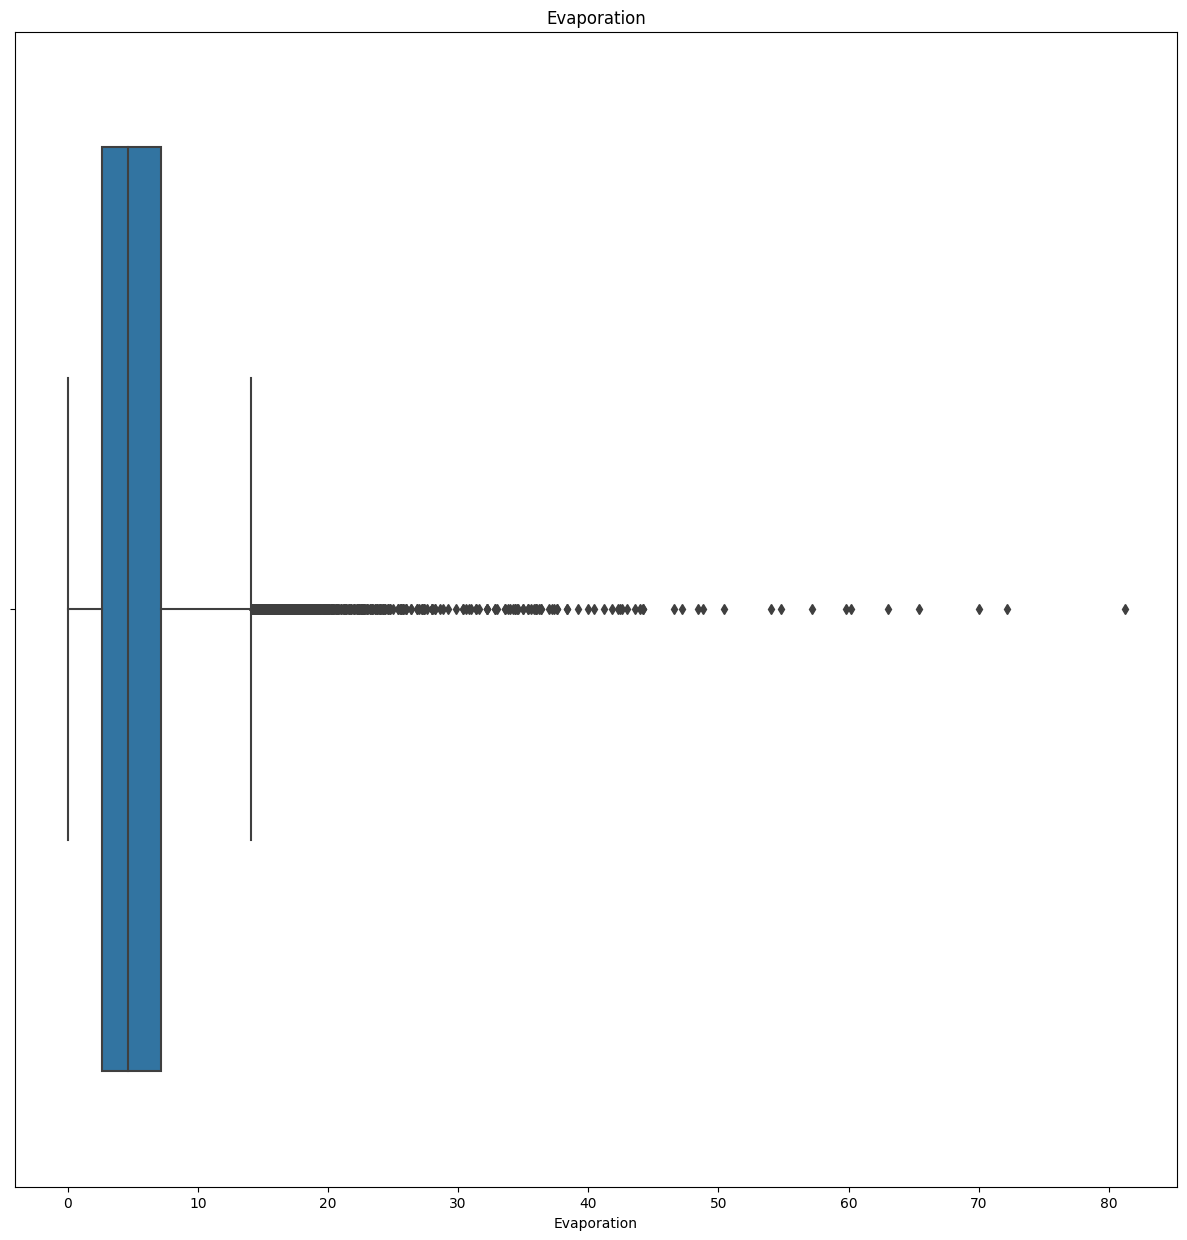

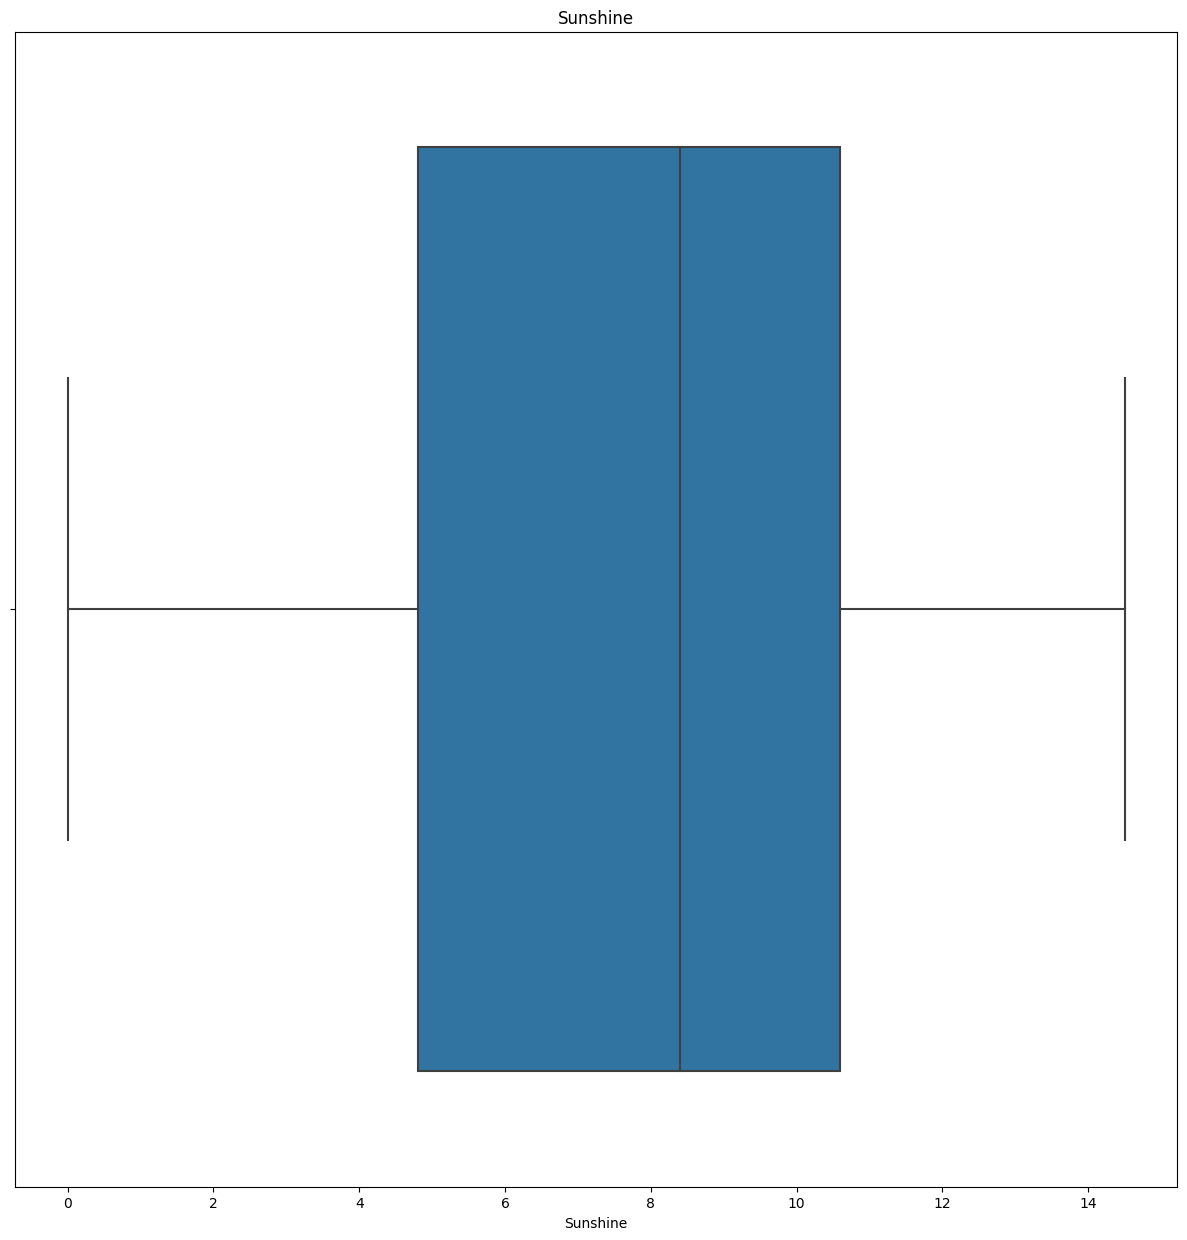

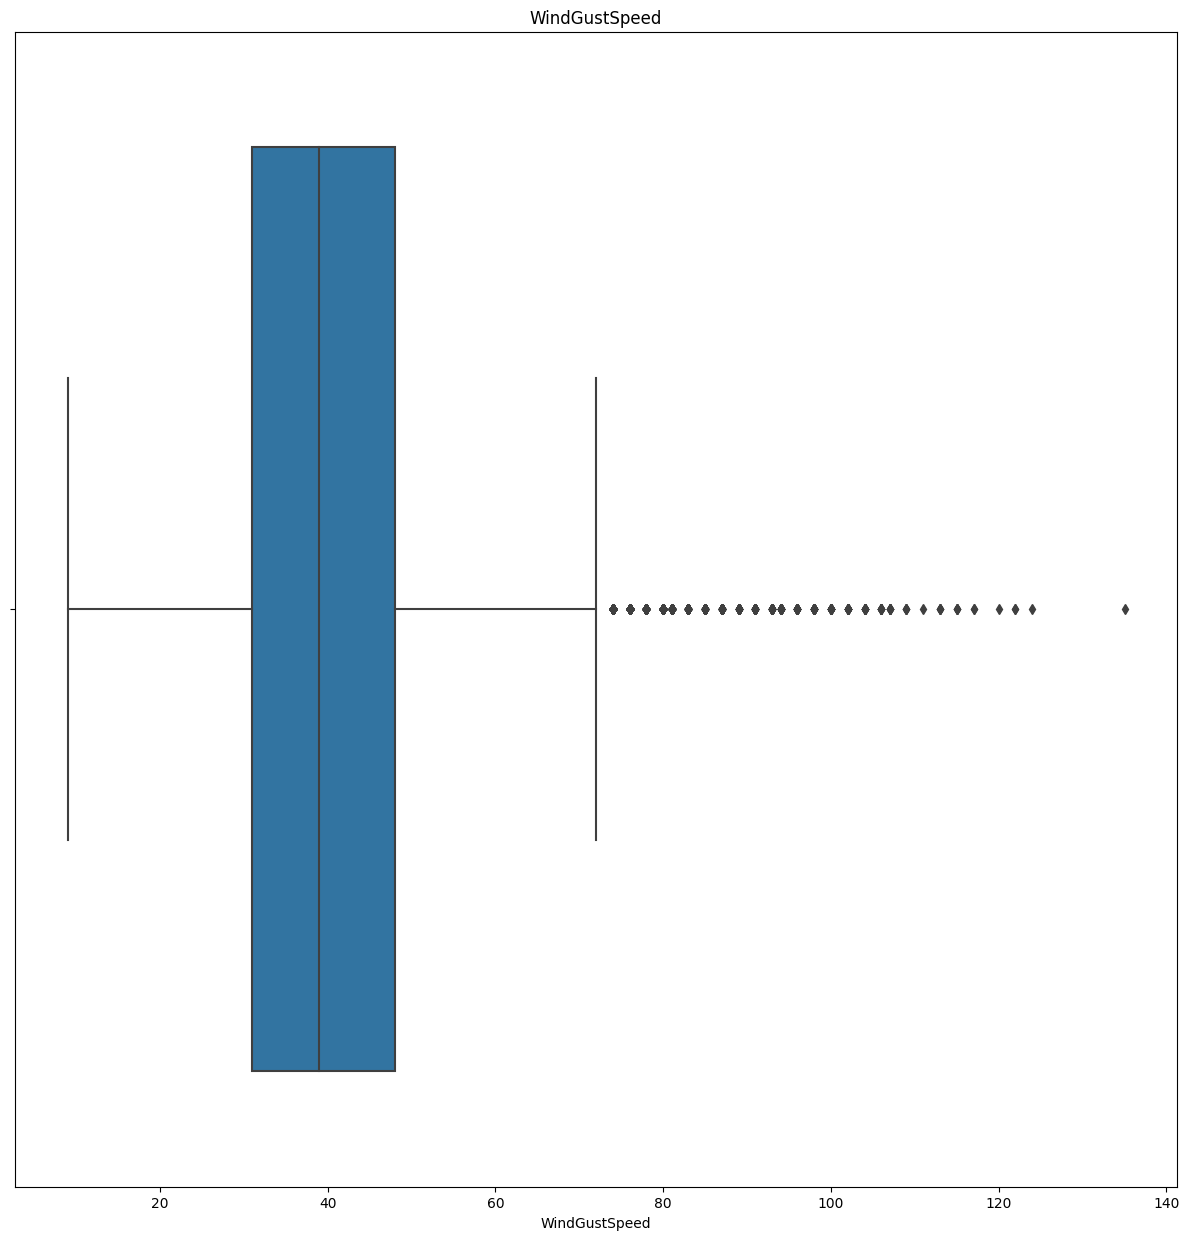

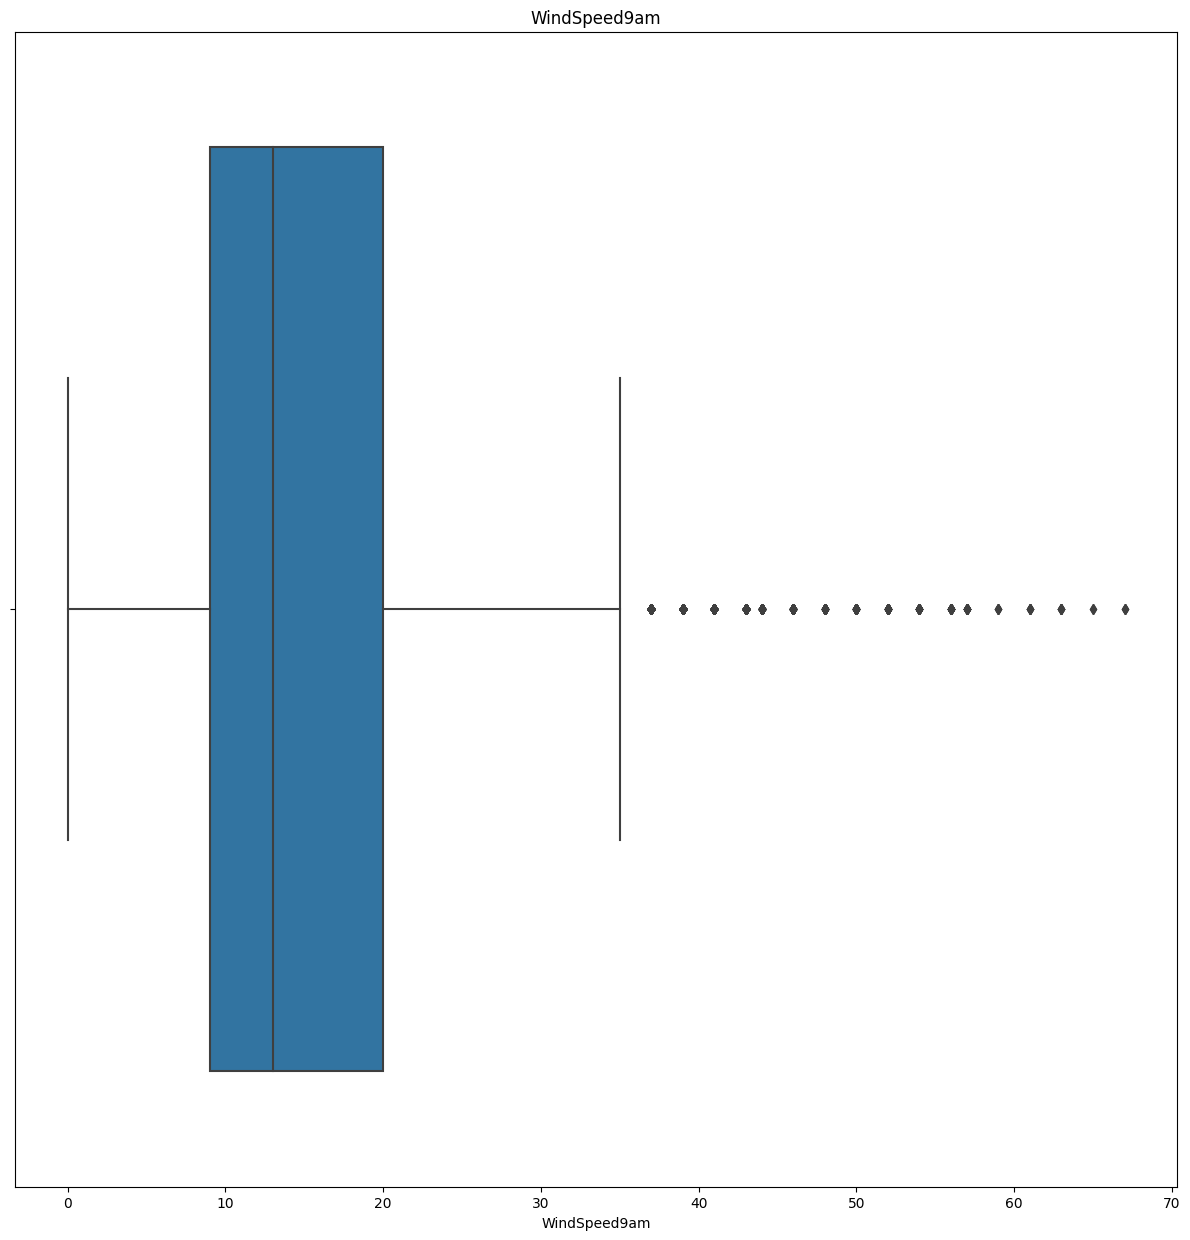

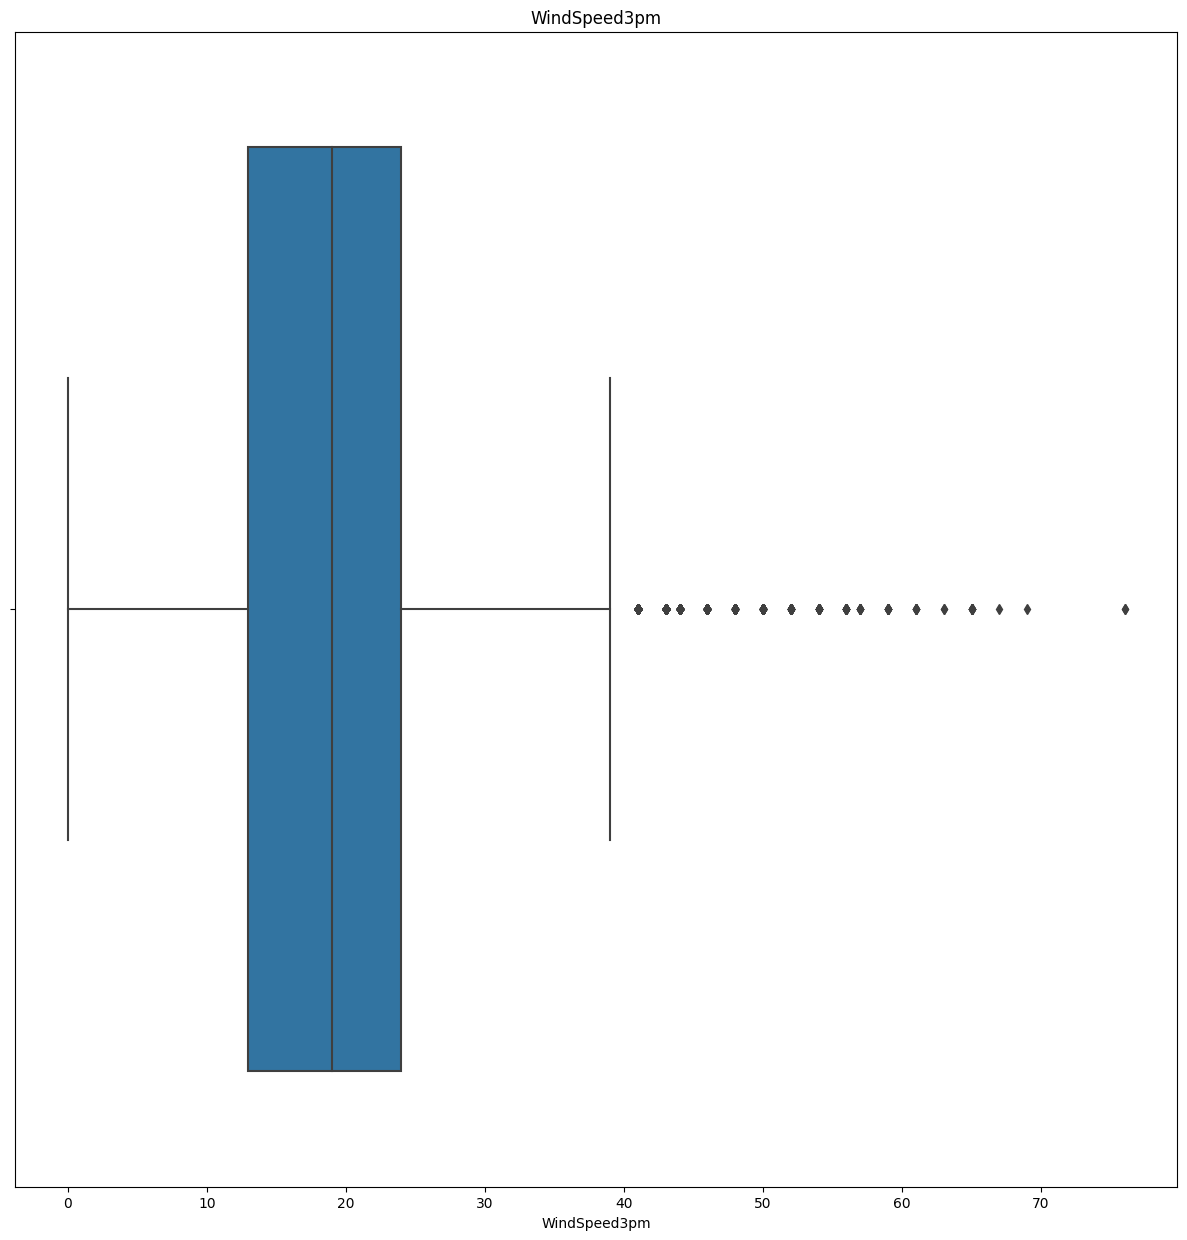

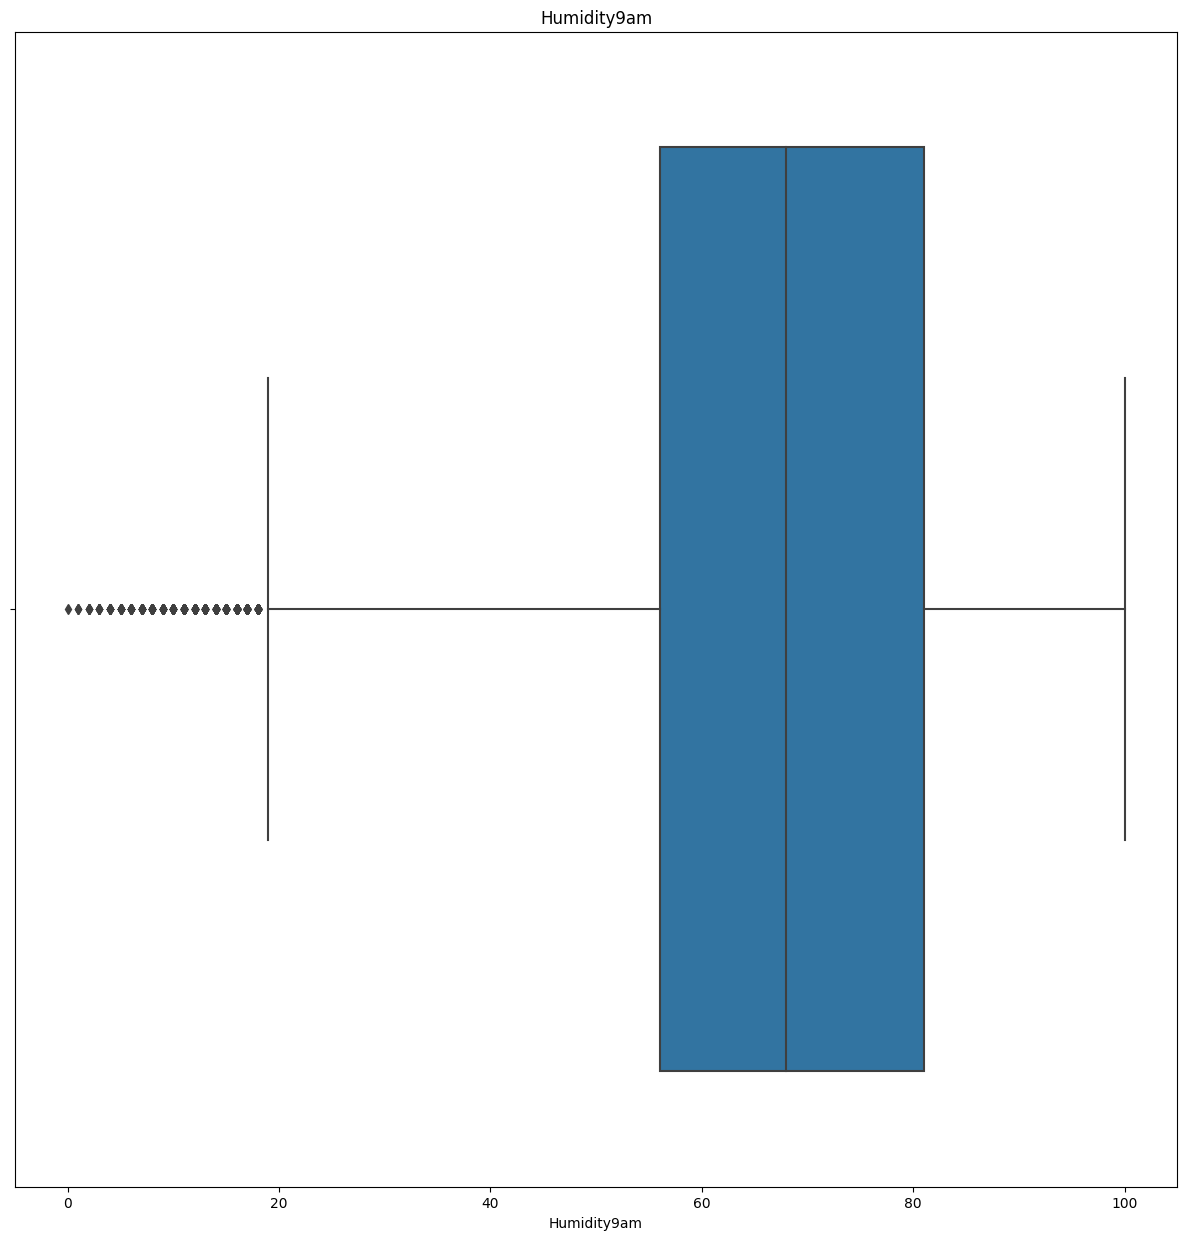

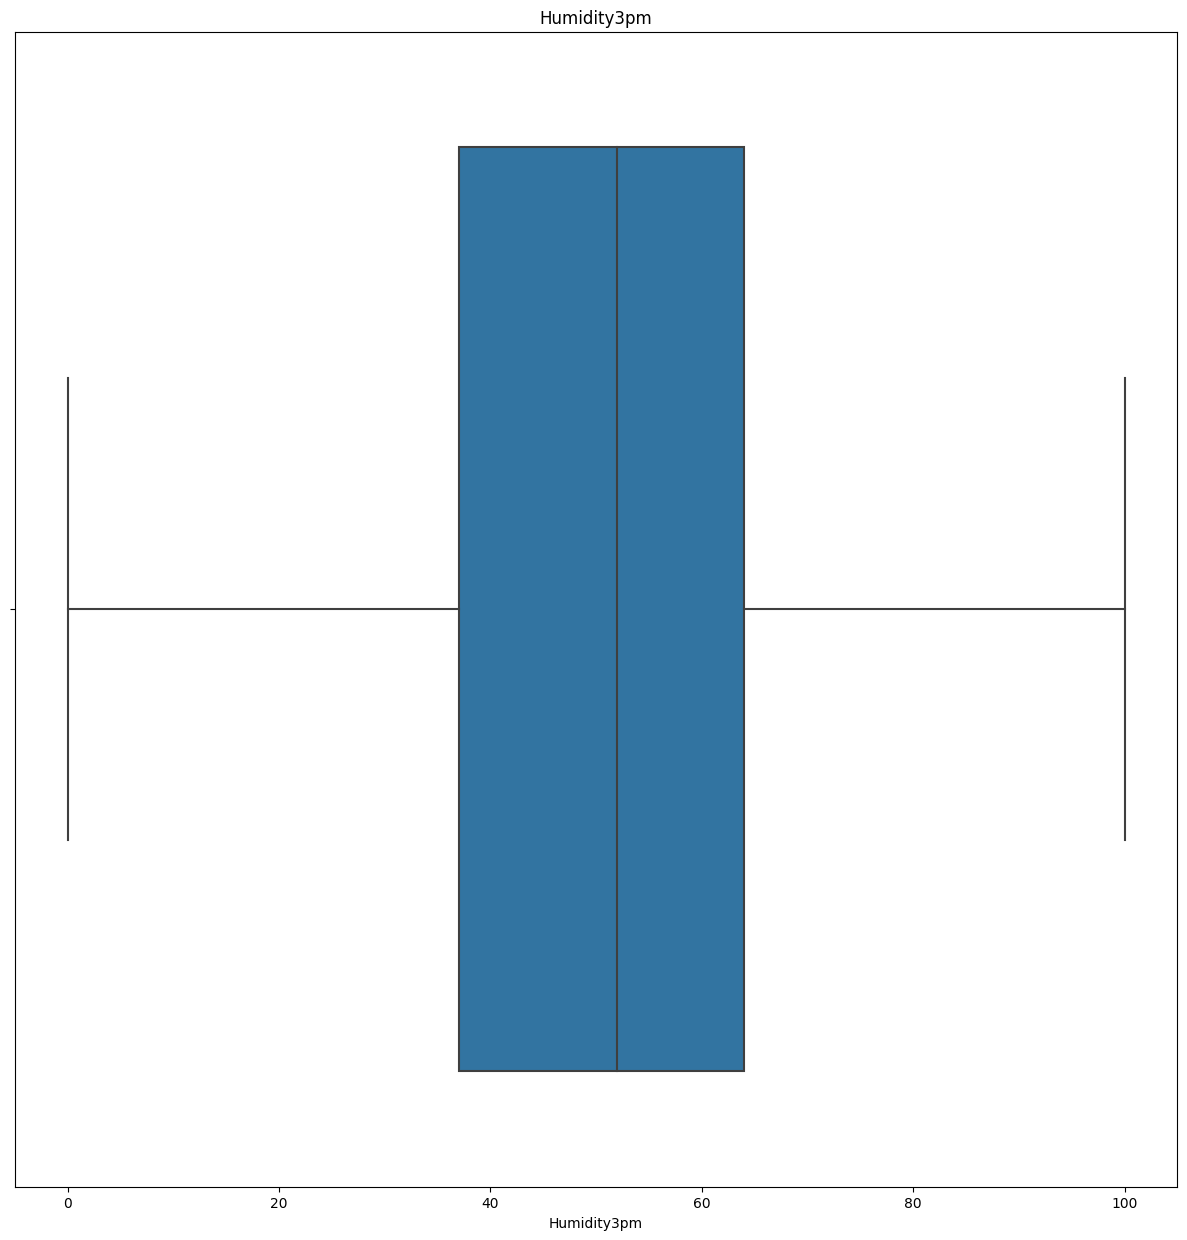

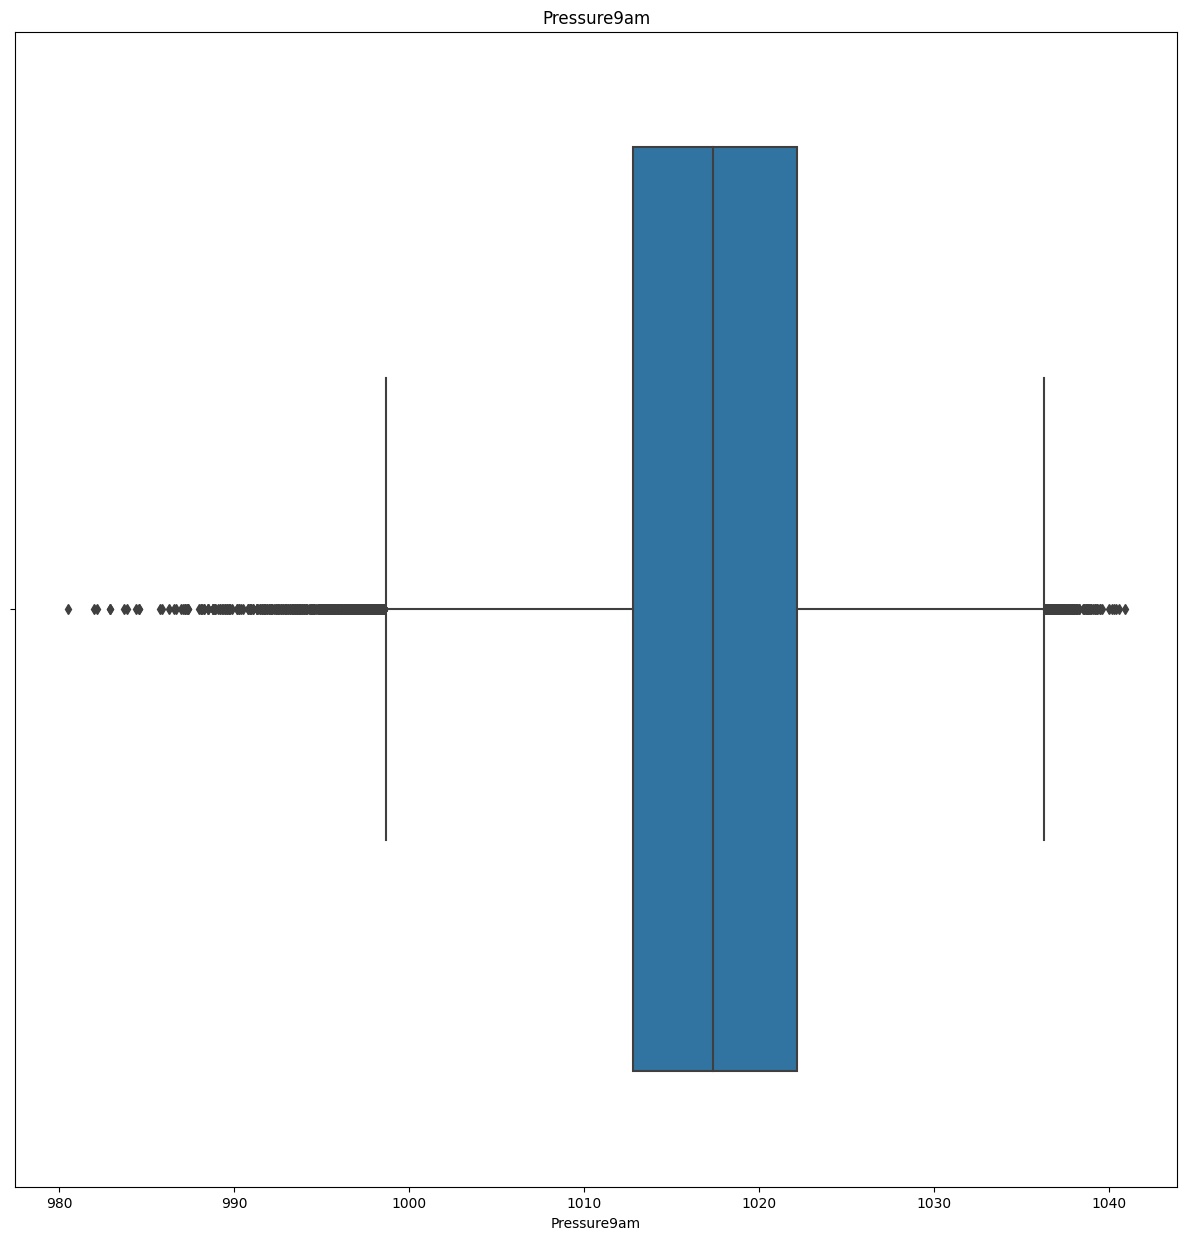

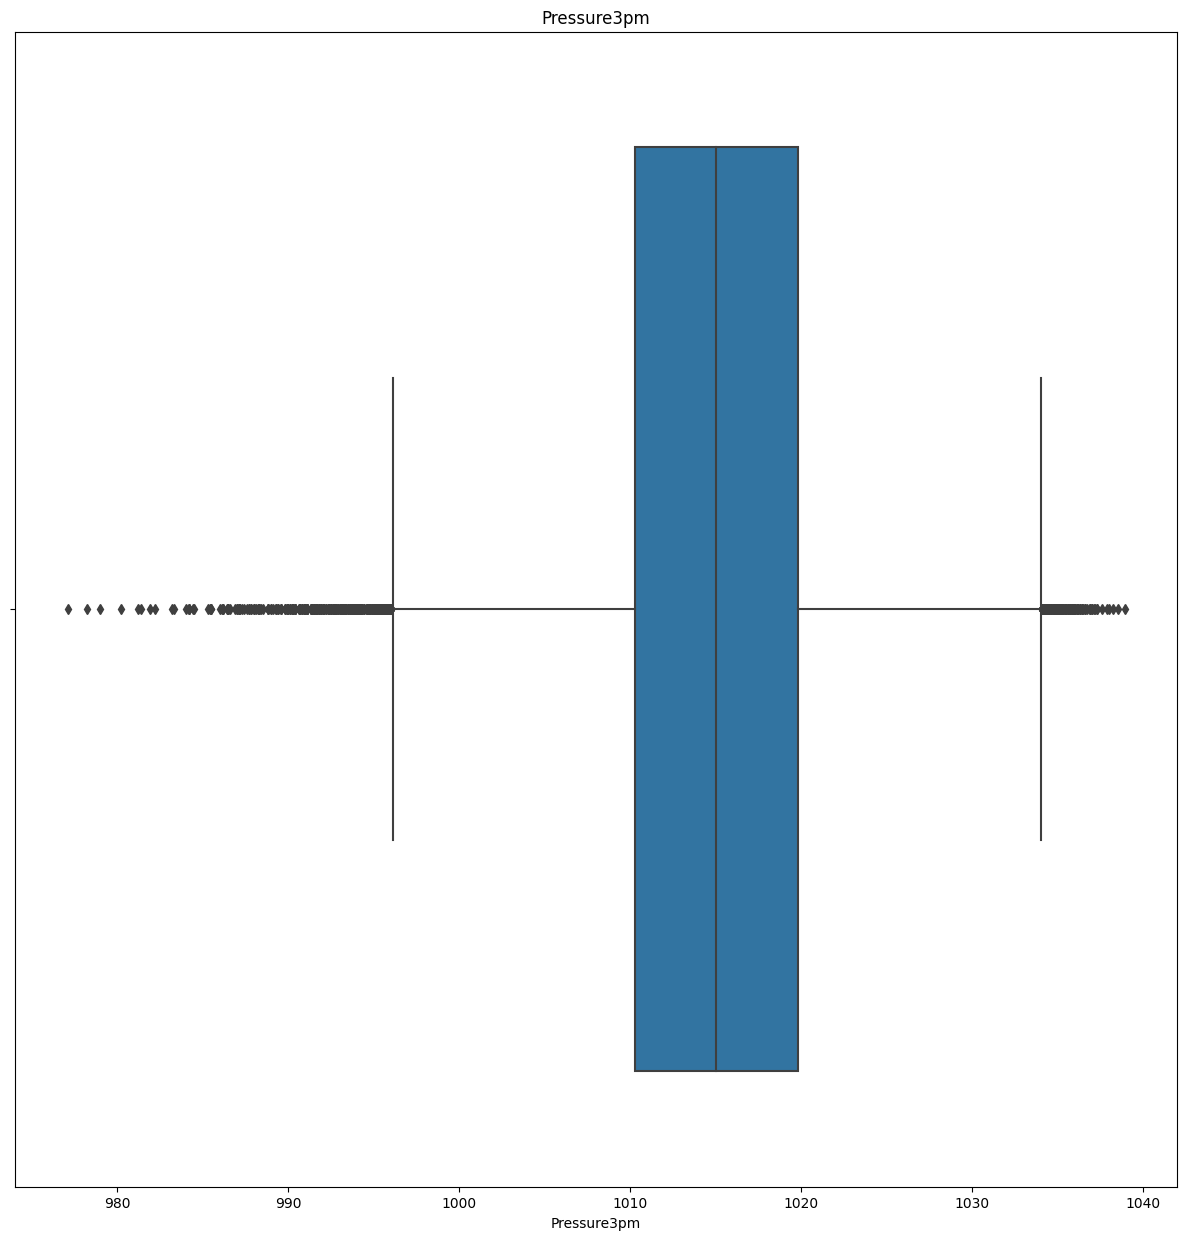

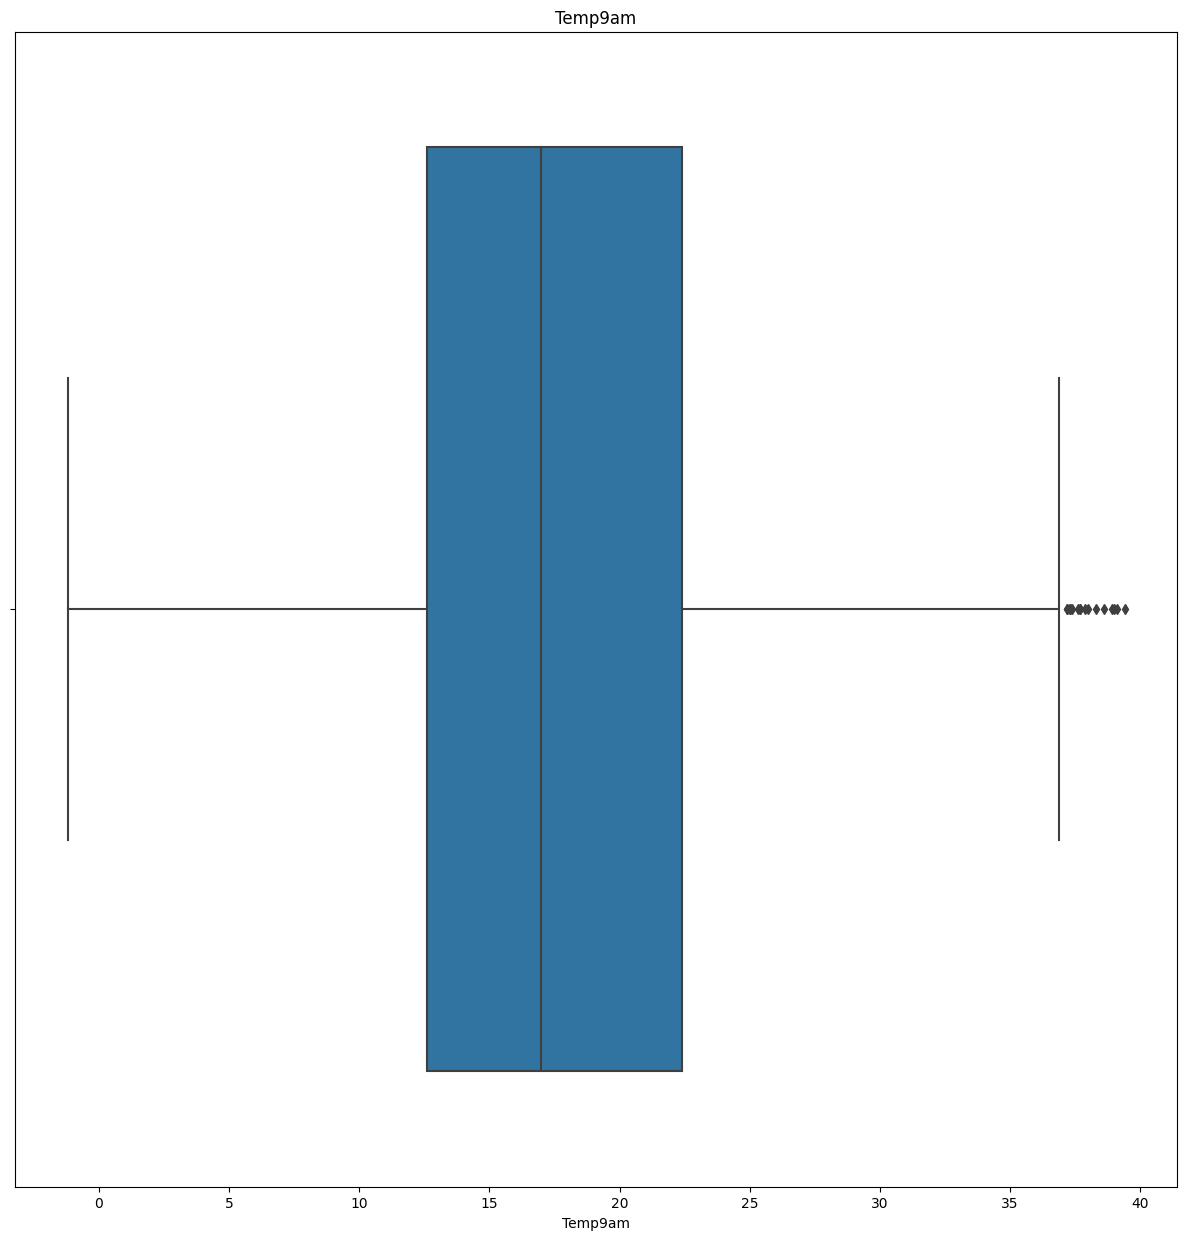

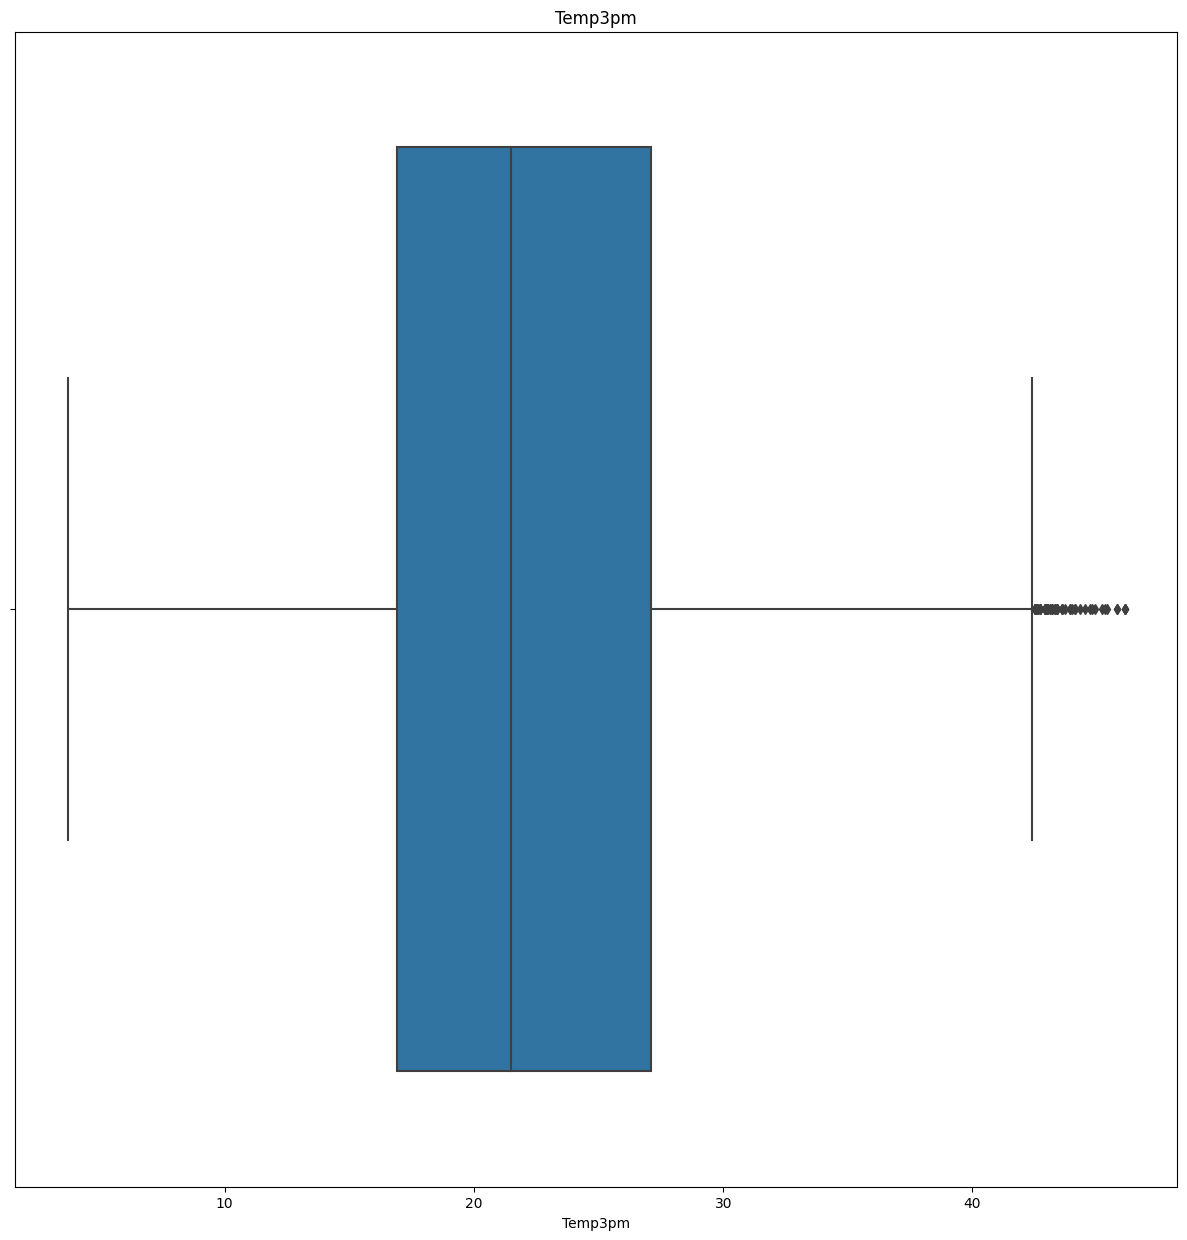

In [128]:
for feature in continous_feature:
    data = df.copy()
    plt.figure(figsize=(15, 15))
    sns.boxplot(data=data, x=feature)
    plt.title(feature)
    plt.show()


In [129]:
def outliars(df,variable):
  IQR =df[variable].quantile(0.75)-df[variable].quantile(0.25)
  lower_bridge = df[variable].quantile(0.25)-(IQR*1.5)
  upper_bridge = df[variable].quantile(0.75)+(IQR*1.5)
  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]>=lower_bridge,variable]=lower_bridge

In [130]:
for feature in continous_feature:
  outliars(df,str(feature))

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/finalweather.csv")
# Filter the DataFrame based on the condition
filtered_df = df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'Yes')]
# Extract the resultant values from the specific columns
print(filtered_df)


              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
11      12-12-2008   Albury     15.9     21.7       2.2          NaN   
12      13-12-2008   Albury     15.9     18.6      15.6          NaN   
17      18-12-2008   Albury     13.5     22.9      16.8          NaN   
102     13-03-2009   Albury     17.1     25.8       5.8          NaN   
103     14-03-2009   Albury     16.4     27.0       3.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145306  23-01-2017    Uluru     23.1     34.5       6.4          NaN   
145321  07-02-2017    Uluru     24.4     37.9       7.6          NaN   
145391  18-04-2017    Uluru     15.2     21.5       6.8          NaN   
145392  19-04-2017    Uluru     17.7     26.9      12.6          NaN   
145393  20-04-2017    Uluru     18.6     28.6      34.6          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
11           NaN         NNE           31.0         NE  ... 

In [132]:
resultant_values = filtered_df[['Date','Pressure9am', 'Pressure3pm']].values

print(resultant_values)


[['12-12-2008' 1010.5 1004.2]
 ['13-12-2008' 994.3 993.0]
 ['18-12-2008' 1005.8 1002.2]
 ...
 ['18-04-2017' 1016.9 1015.3]
 ['19-04-2017' 1018.1 1014.7]
 ['20-04-2017' 1020.0 1015.8]]


#Data analysis

In [133]:
import scipy.stats as stats 
def  qq_plots(df,variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  df[variable].hist()
  plt.subplot(1,2,2)
  stats.probplot(df[variable],dist="norm",plot=plt)
  plt.show()

MinTemp


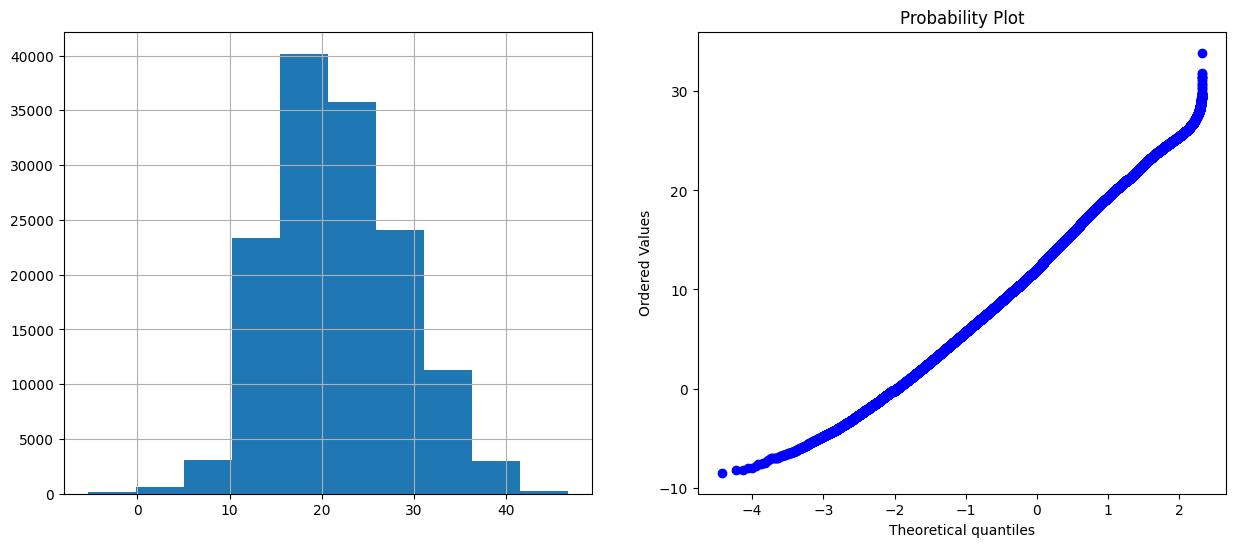

MaxTemp


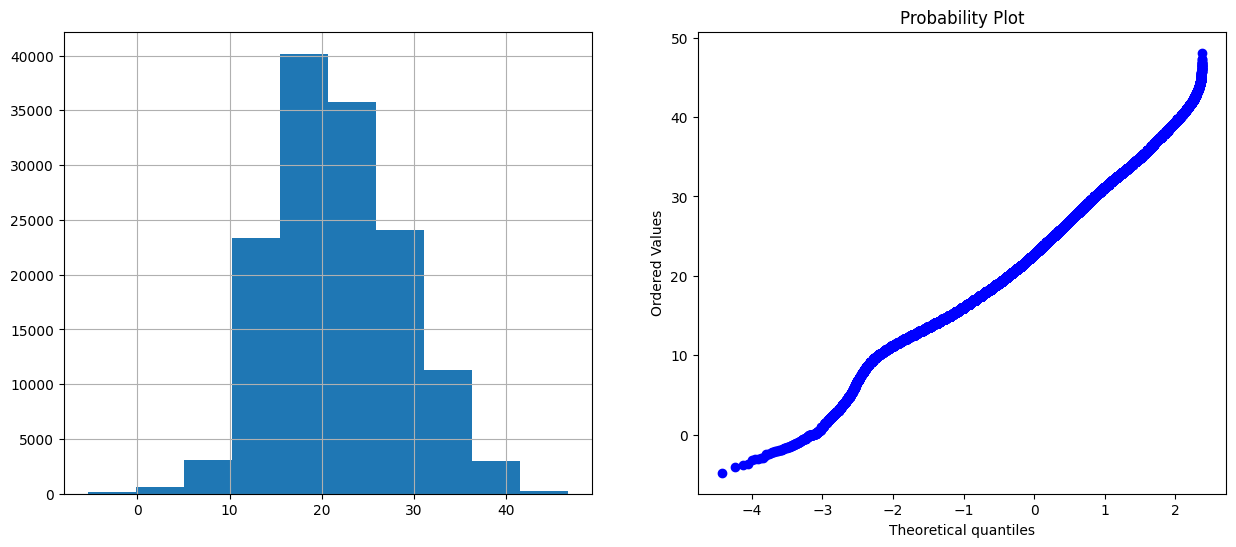

Rainfall


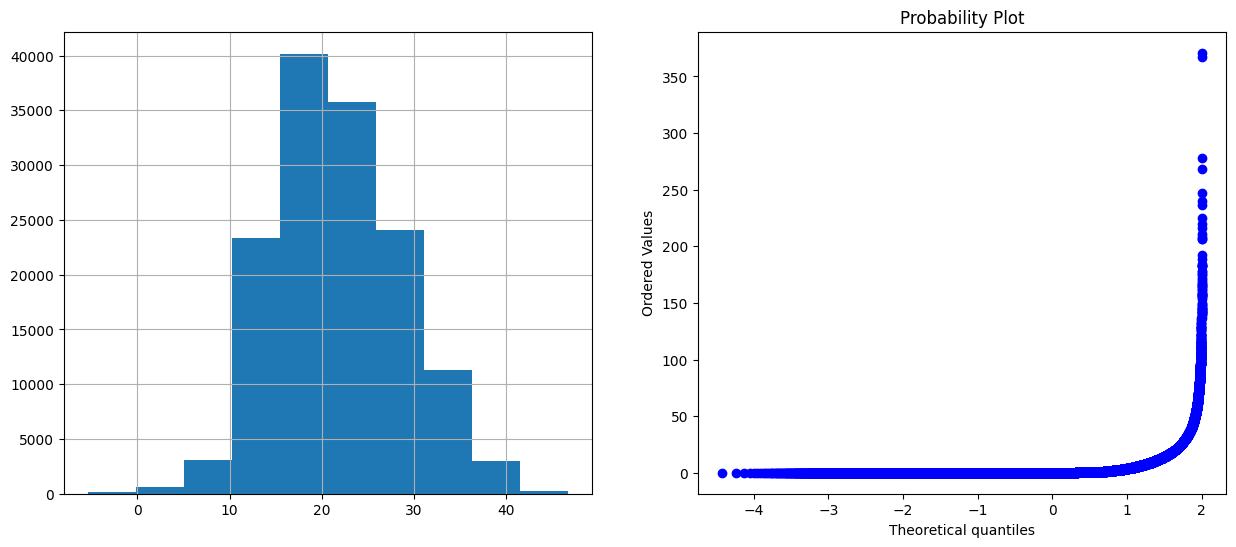

Evaporation


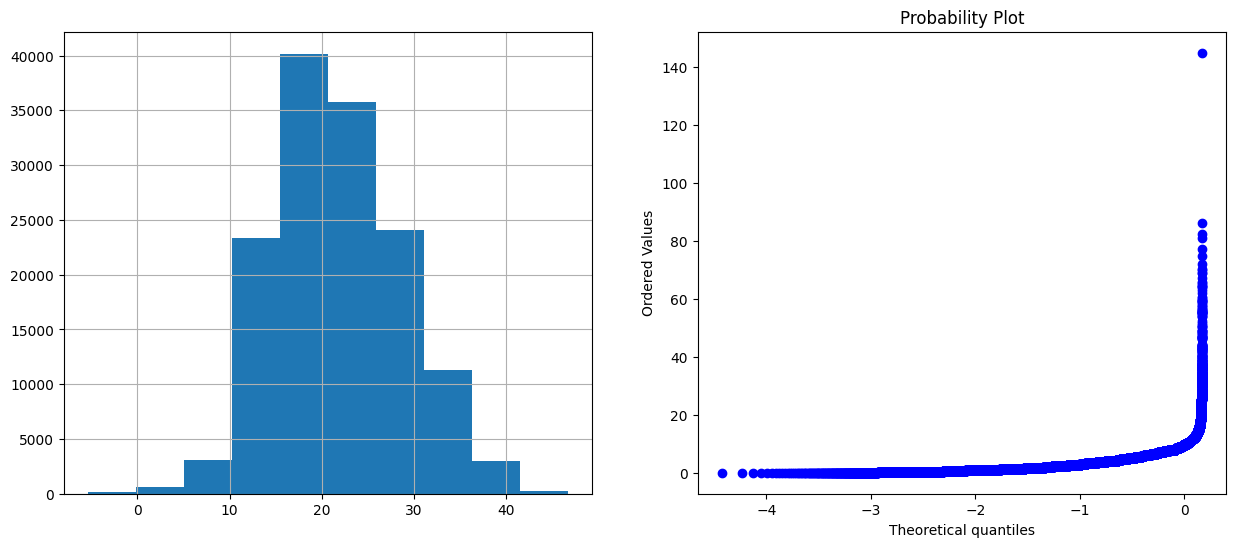

Sunshine


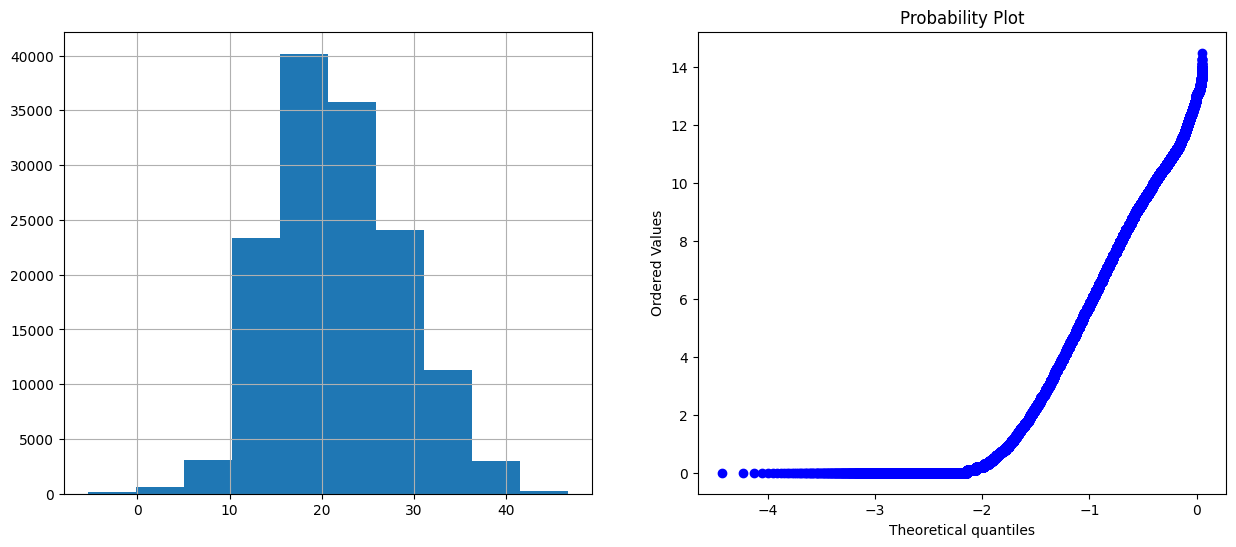

WindGustSpeed


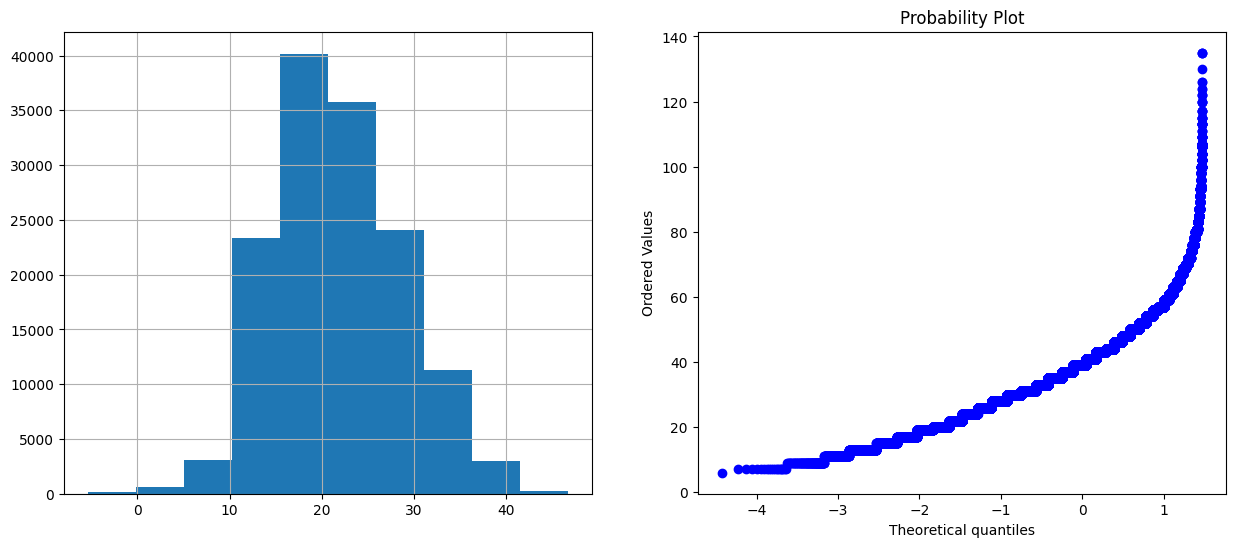

WindSpeed9am


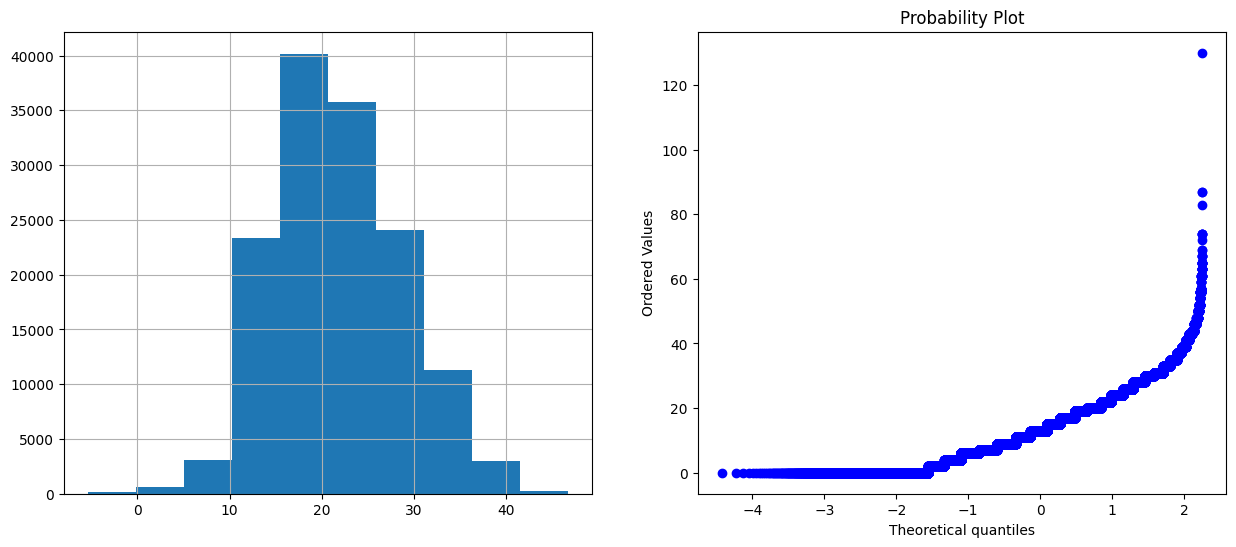

WindSpeed3pm


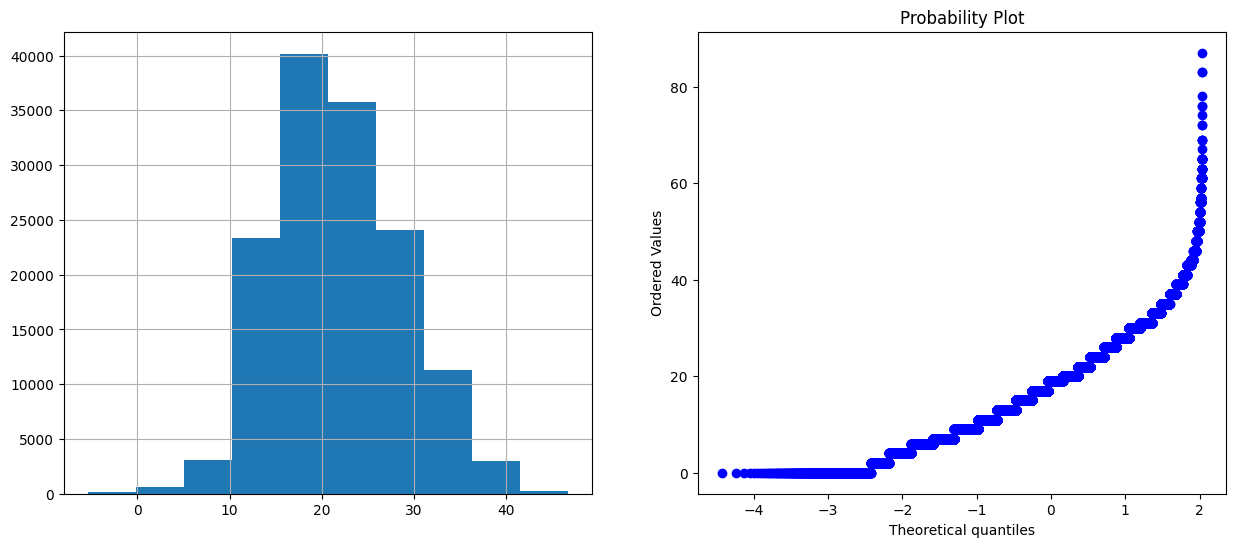

Humidity9am


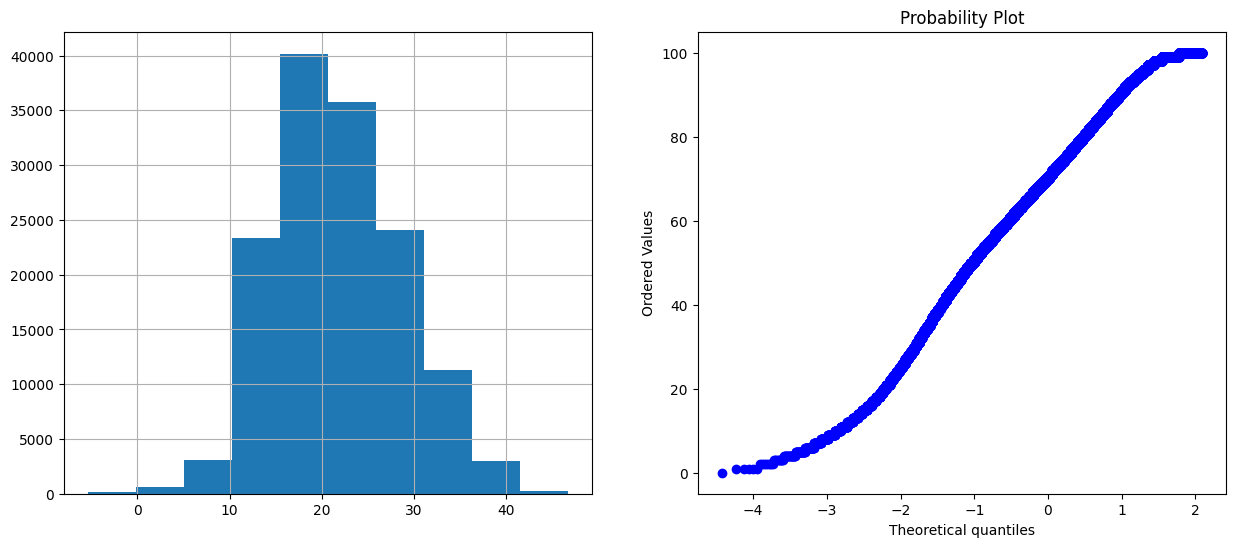

Humidity3pm


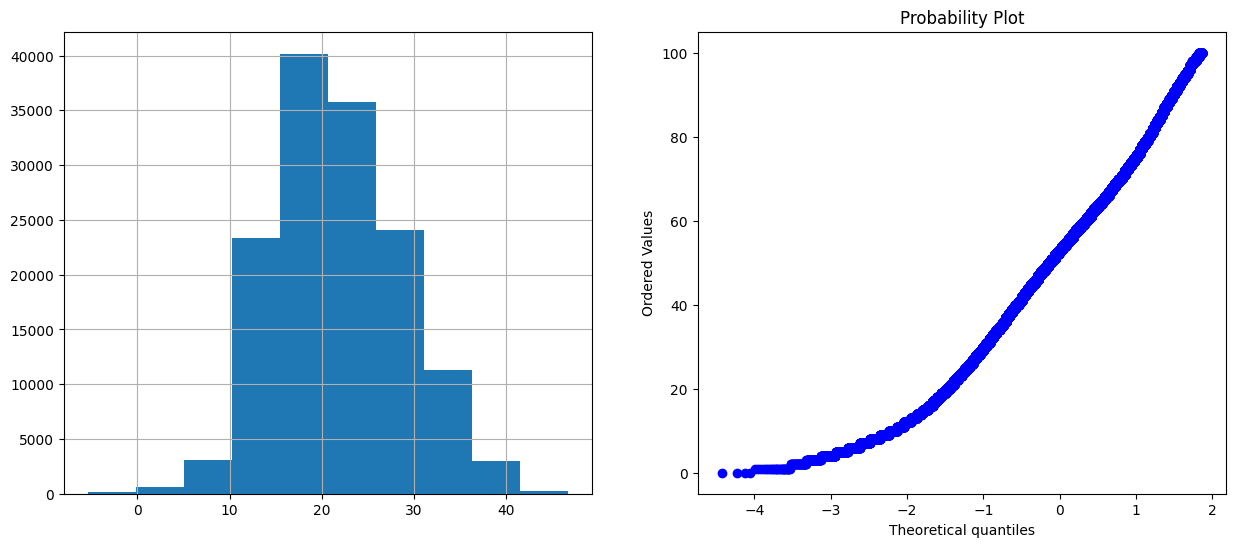

Pressure9am


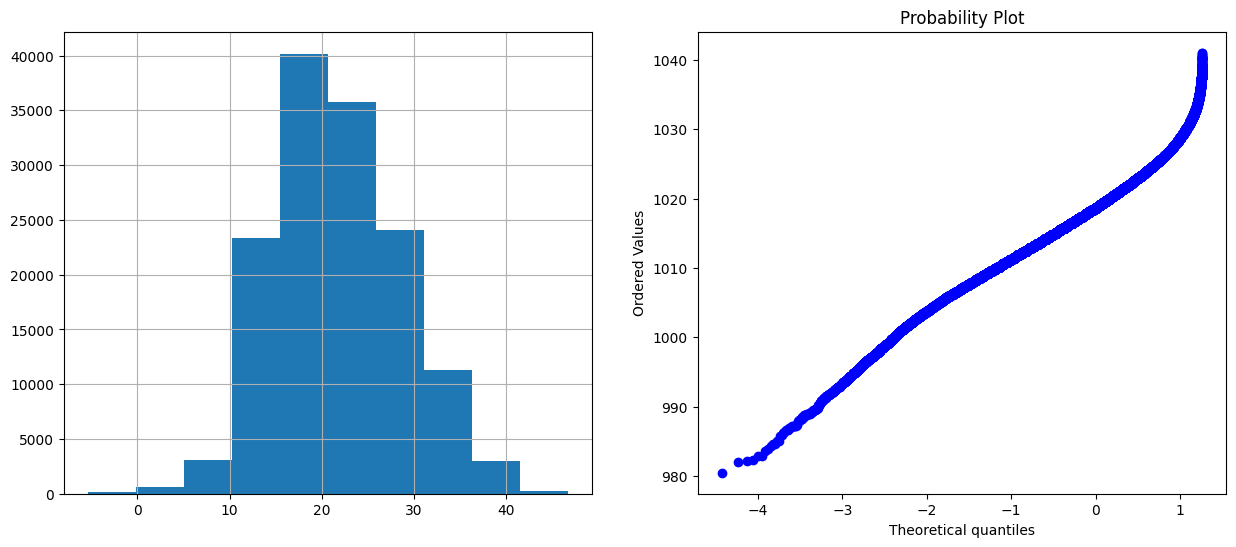

Pressure3pm


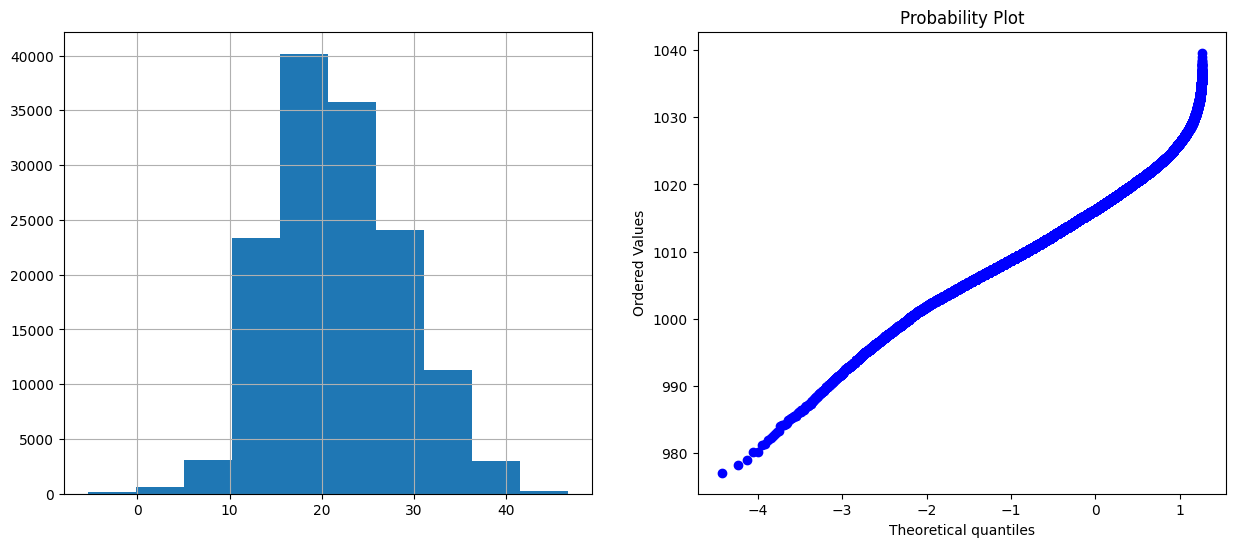

Temp9am


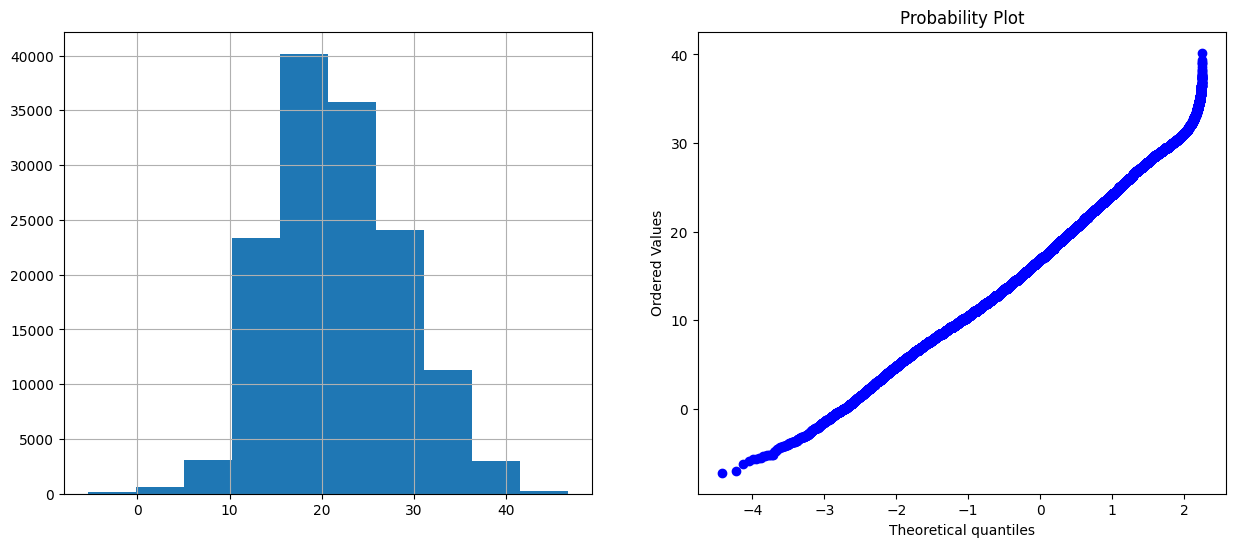

Temp3pm


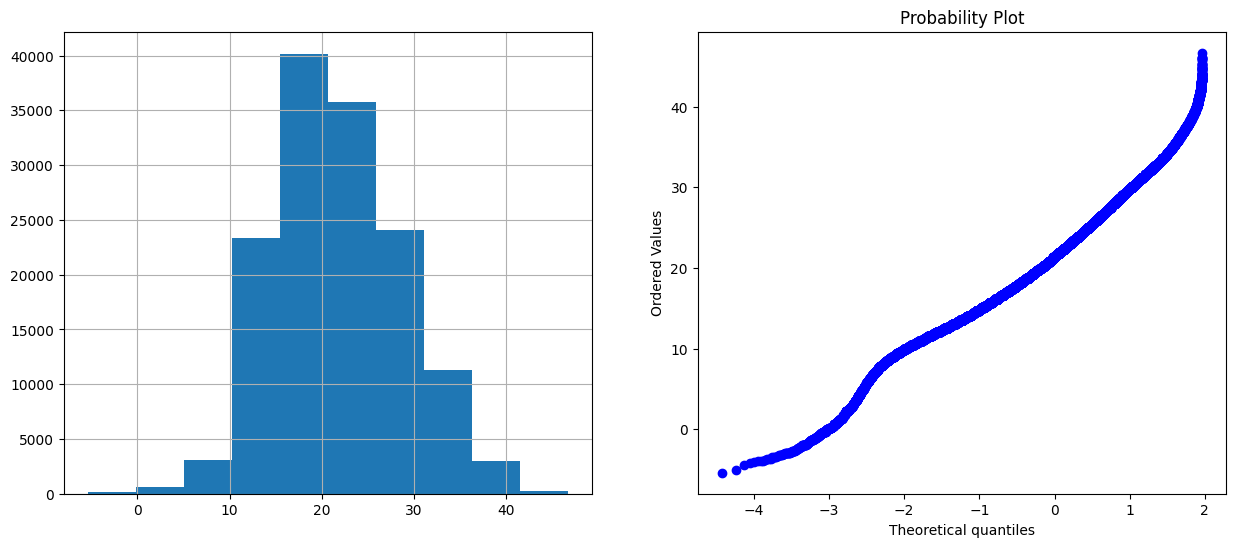

In [134]:
for feature in continous_feature:
  print(feature)
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  df[features].hist()
  plt.subplot(1,2,2)
  stats.probplot(df[feature],dist="norm",plot=plt)
  plt.show()

In [135]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [137]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,25-06-2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [138]:
x=df.drop(["RainTomorrow","Date"],axis=1)

In [139]:
y =df["RainTomorrow"]

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [143]:
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"],drop_first=True)
df["RainToday"] = pd.get_dummies(df["RainToday"],drop_first=True)

In [189]:
df["Location"] = labelencoder.fit_transform(df["Location"])
df["WindGustDir"] = labelencoder.fit_transform(df["WindGustDir"])
df["WindDir9am"] = labelencoder.fit_transform(df["WindDir9am"])
df["WindDir3pm"] = labelencoder.fit_transform(df["WindDir3pm"])
df["Evaporation"] = labelencoder.fit_transform(df["Evaporation"])

In [200]:
df = df[df["Sunshine"].notna()]
df = df[df["WindGustSpeed"].notna()]


In [209]:
for column in df.columns:
    # Fill missing values in the column based on the column itself
    fill_value = df[column].describe()[0]
    df[column].fillna(fill_value, inplace=True)

In [210]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,01-01-2009,10,17.9,35.2,0.0,120,12.3,11,48.0,1,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,02-01-2009,10,18.4,28.9,0.0,146,13.0,8,37.0,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6051,03-01-2009,10,15.5,34.1,0.0,126,13.3,9,30.0,16,...,70264.0,7.0,70544.0,1011.6,62544.0,1.0,70531.0,32.7,0,0
6052,04-01-2009,10,19.4,37.6,0.0,108,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,05-01-2009,10,21.9,38.4,0.0,114,12.2,14,31.0,14,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,20-06-2017,13,19.3,33.4,0.0,60,11.0,1,35.0,9,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,21-06-2017,13,21.2,32.6,0.0,76,8.6,0,37.0,9,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,22-06-2017,13,20.7,32.8,0.0,56,11.0,0,33.0,0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,23-06-2017,13,19.5,31.8,0.0,62,10.6,2,26.0,9,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [217]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [202]:
x=df.drop(["RainTomorrow","Date"],axis=1)
y =df["RainTomorrow"]

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [216]:
x_train.isnull().sum()

Location            0
MinTemp           416
MaxTemp           385
Rainfall          888
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am       57
WindSpeed3pm       48
Humidity9am       685
Humidity3pm       632
Pressure9am       445
Pressure3pm       450
Cloud9am         6867
Cloud3pm         7979
Temp9am           464
Temp3pm           430
RainToday           0
dtype: int64

In [220]:
for column in x_train.columns:
    # Fill missing values in the column based on the column itself
    fill_value = x_train[column].describe()[0]
    x_train[column].fillna(fill_value, inplace=True)

In [221]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [213]:
y_train

137481    0
61510     0
67159     0
122931    0
118158    1
         ..
37151     0
23632     1
66939     0
121033    0
9435      0
Name: RainTomorrow, Length: 56888, dtype: uint8

In [214]:
y_test

68480     0
95325     0
66538     0
121014    0
34458     0
         ..
34085     1
64217     0
121294    0
137171    0
120557    0
Name: RainTomorrow, Length: 14222, dtype: uint8

#Model Training

In [223]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=0)
x_train_res,y_train_res = sm.fit_resample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_res)))


The number of classes before fitCounter({0: 44466, 1: 12422})
The number of classes after fitCounter({0: 44466, 1: 44466})


In [224]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [229]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations =2000,eval_metric="AUC")
cat.fit(x_train_res,y_train_res)

Learning rate set to 0.03708
0:	total: 125ms	remaining: 4m 9s
1:	total: 206ms	remaining: 3m 26s
2:	total: 271ms	remaining: 3m
3:	total: 349ms	remaining: 2m 53s
4:	total: 428ms	remaining: 2m 50s
5:	total: 515ms	remaining: 2m 51s
6:	total: 585ms	remaining: 2m 46s
7:	total: 642ms	remaining: 2m 39s
8:	total: 714ms	remaining: 2m 37s
9:	total: 763ms	remaining: 2m 31s
10:	total: 838ms	remaining: 2m 31s
11:	total: 905ms	remaining: 2m 30s
12:	total: 974ms	remaining: 2m 28s
13:	total: 1.05s	remaining: 2m 28s
14:	total: 1.09s	remaining: 2m 24s
15:	total: 1.13s	remaining: 2m 19s
16:	total: 1.15s	remaining: 2m 14s
17:	total: 1.18s	remaining: 2m 10s
18:	total: 1.21s	remaining: 2m 6s
19:	total: 1.24s	remaining: 2m 2s
20:	total: 1.27s	remaining: 1m 59s
21:	total: 1.32s	remaining: 1m 58s
22:	total: 1.4s	remaining: 2m
23:	total: 1.47s	remaining: 2m
24:	total: 1.53s	remaining: 2m 1s
25:	total: 1.6s	remaining: 2m 1s
26:	total: 1.68s	remaining: 2m 2s
27:	total: 1.74s	remaining: 2m 2s
28:	total: 1.81s	remai

In [230]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [231]:
from sklearn import metrics 

In [232]:
y_pred = cat.predict(x_test)

In [233]:
accuracy_score(y_test,y_pred)

0.8640135002109408

In [234]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.92     11038\n           1       0.76      0.57      0.65      3184\n\n    accuracy                           0.86     14222\n   macro avg       0.82      0.76      0.78     14222\nweighted avg       0.86      0.86      0.86     14222\n'

In [235]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11038
           1       0.76      0.57      0.65      3184

    accuracy                           0.86     14222
   macro avg       0.82      0.76      0.78     14222
weighted avg       0.86      0.86      0.86     14222



In [238]:
metrics.plot_roc_curve(cat,x_test,y_test)

AttributeError: ignored

In [239]:
metrics.roc_auc_score(y_test,y_pred,average=None)

0.7589784911602767

In [241]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [242]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

# Assuming 'cat' is your trained CatBoost model and 'x_test' and 'y_test' are your test data

# Plot the ROC curve
plot_roc_curve(cat, x_test, y_test)
plt.show()


ImportError: ignored

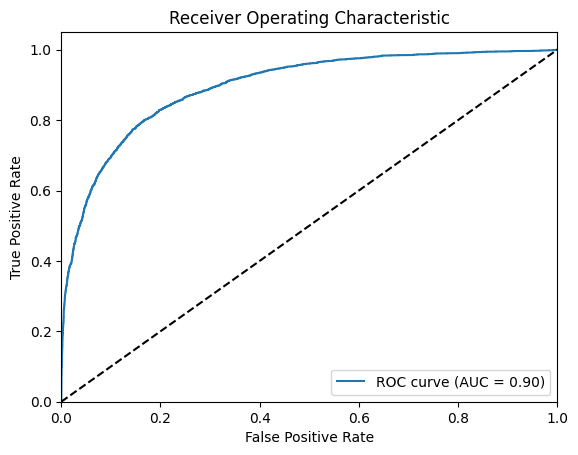

In [243]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'cat' is your trained CatBoost model and 'x_test' and 'y_test' are your test data

# Make predictions on the test data
y_scores = cat.predict_proba(x_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [248]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier() 
rf.fit(x_train_res,y_train_res)



RandomForestClassifier()

In [254]:
x_test.isnull().sum()

Location            0
MinTemp           112
MaxTemp           104
Rainfall          239
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am       13
WindSpeed3pm       12
Humidity9am       161
Humidity3pm       153
Pressure9am       121
Pressure3pm       120
Cloud9am         1699
Cloud3pm         1943
Temp9am           115
Temp3pm           113
RainToday           0
dtype: int64

In [255]:
for column in x_test.columns:
    # Fill missing values in the column based on the column itself
    fill_value = x_test[column].describe()[0]
    x_test[column].fillna(fill_value, inplace=True)

In [262]:
y_pred1 =  rf.predict(x_test) 
print(confusion_matrix(y_test,y_pred1)) 
print (accuracy_score(y_test,y_pred1)) 
print(classification_report (y_test,y_pred1))



[[9928 1110]
 [1007 2177]]
0.8511461116579947
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     11038
           1       0.66      0.68      0.67      3184

    accuracy                           0.85     14222
   macro avg       0.79      0.79      0.79     14222
weighted avg       0.85      0.85      0.85     14222



In [264]:

metrics.roc_auc_score(y_test, y_pred1, average=None)


0.7915847299097408

In [267]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res,y_train_res)

GaussianNB()

In [268]:
y_pred3 =  gnb.predict(x_test) 
print(confusion_matrix(y_test,y_pred3)) 
print (accuracy_score(y_test,y_pred3)) 
print(classification_report (y_test,y_pred3))

[[  141 10897]
 [   17  3167]]
0.2325973843341302
              precision    recall  f1-score   support

           0       0.89      0.01      0.03     11038
           1       0.23      0.99      0.37      3184

    accuracy                           0.23     14222
   macro avg       0.56      0.50      0.20     14222
weighted avg       0.74      0.23      0.10     14222



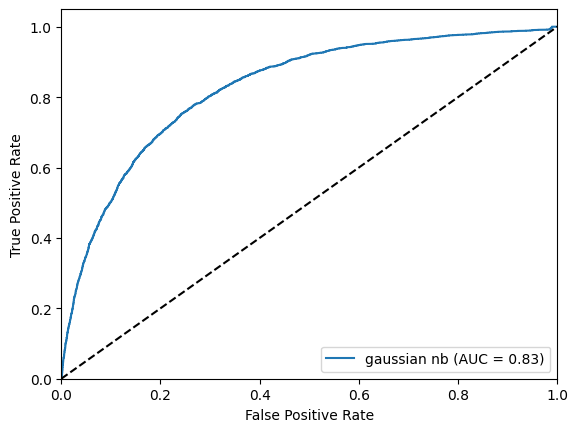

In [274]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'gnb' is your trained Gaussian Naive Bayes model and 'x_test' and 'y_test' are your test data

# Make predictions on the test data
y_scores = gnb.predict_proba(x_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='gaussian nb (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()


In [275]:

metrics.roc_auc_score(y_test, y_pred3, average=None)

0.5037174286453103

In [270]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [277]:
import pickle
filename = "fianlizedmodel.pkl"
pickle.dump(cat,open(filename,"wb"))


In [279]:
from google.colab import files

# Provide the path to your pickled file
files.download('/content/fianlizedmodel.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [283]:
import pickle

# Specify the path to your pickled file
file_path = '/content/fianlizedmodel.pkl'

# Load the pickled file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Access the data
print(data)
